# Importing Libraries and Defining Functions

In [3]:
import pandas as pd
import pyreadstat
import os
import re


def load_file(file_path, sheet_name=None, sheet_indices=None):
    """
    Loads a .sav (SPSS), .csv, or Excel file into a Pandas DataFrame.

    Parameters:
    file_path (str): The path to the file.
    sheet_name (str/int or None): Specific sheet name or index for Excel.
    sheet_indices (list of int or None): List of sheet indices to load (for Excel only).

    Returns:
    tuple:
        - df (DataFrame, list of DataFrames, or dict of DataFrames): Loaded data.
        - meta (pyreadstat.metadata_container or None): Metadata if loading .sav file.

    Notes:
    - If both sheet_name and sheet_indices are None, loads all Excel sheets.
    - If sheet_indices is provided, sheet_name is ignored.
    """
    if not os.path.exists(file_path):
        print(f"Error: File not found -> {file_path}")
        return None, None

    file_extension = os.path.splitext(file_path)[-1].lower()

    try:
        if file_extension == ".sav":
            df, meta = pyreadstat.read_sav(file_path)
            print(f"Successfully loaded SPSS file: {file_path}")
            return df, meta

        elif file_extension == ".csv":
            df = pd.read_csv(file_path)
            print(f"Successfully loaded CSV file: {file_path}")
            return df, None

        elif file_extension in [".xls", ".xlsx"]:
            excel_file = pd.ExcelFile(file_path)
            sheet_names = excel_file.sheet_names

            # Load specific sheet indices (as list of DataFrames)
            if sheet_indices is not None:
                selected_dfs = [excel_file.parse(sheet_names[i])
                                for i in sheet_indices if i < len(sheet_names)]
                print(f"Successfully loaded sheets at indices {sheet_indices}")
                return selected_dfs, None

            # Load a specific sheet
            elif sheet_name is not None:
                df = pd.read_excel(file_path, sheet_name=sheet_name)
                print(f"Successfully loaded sheet: {sheet_name}")
                return df, None

            # Load all sheets (as a dict)
            else:
                df = pd.read_excel(file_path, sheet_name=None)
                print(f"Successfully loaded all sheets from Excel file: {file_path}")
                return df, None

        else:
            print(f"Error: Unsupported file format -> {file_extension}")
            return None, None

    except Exception as e:
        print(f"Error loading file: {e}")
        return None, None

        

def find_columns(df, pattern):
    return [col for col in df.columns if re.search(pattern, col, re.IGNORECASE)]
    
def filter_desired_columns(data, *columns):
    selected_columns = []

    for col in columns:
        if isinstance(col, list):  # If col is a list, add all items to selected_columns
            selected_columns.extend(col)
        else:  # If col is a single column name, add it directly
            selected_columns.append(col)
    
    try:
        return data[selected_columns]  # Filter DataFrame with selected columns
    except KeyError as e:
        print(f"Error: Some columns not found in DataFrame - {e}")
        return None 
    
def map_numerical_data_to_labels(data,column_name="x" ,new_name="y",mapping={}):
    data[new_name]=data[column_name].map(mapping)
    data.drop(column_name, axis=1, inplace=True)
    return data

def age(data):
    a=data[data[age_column]==1]
    return a

def males(data):
    b=data[data[gender_column]==1]
    return b# Or any other number that the data might represent as male

def females(data):
    b=data[data[gender_column]==2]
    return b
    
def sport(data):
    b=data[data[sport_column]==1]
    return b

def weighted_sports_count(data, weight_column="z"):
    c=(data.filter(like='Age').T*data[weight_column]).sum(axis=1)
    return c.sum()

import os

def convert_to_desired_format(data, desired_fileformat='csv', desired_file_name=None):
     # Default file name if none is provided
    if desired_file_name is None:
        desired_file_name = f"output.{desired_fileformat}"
    
    # Convert and save in the required format
    if desired_fileformat.lower() == 'csv':
        data.to_csv(desired_file_name, index=False)
    elif desired_fileformat.lower() == 'json':
        data.to_json(desired_file_name, orient="records", indent=4)
    elif desired_fileformat.lower() in ['xls', 'xlsx', 'excel']:
        data.to_excel(desired_file_name, index=False, engine="openpyxl")
    else:
        raise ValueError("Unsupported file format. Choose from: 'csv', 'json', 'excel'.")

    print(f"Data saved as {desired_file_name}")
                                                                                    

# Function 1: load_file()

In [11]:
file_path="ALS_Young_2017-18.sav"

Successfully loaded sheets at indices [1, 3, 5, 7, 9, 11, 13, 15]


In [13]:
#If the file is sav file use this code
df_1, meta = load_file(file_path, sheet_name=1)

Successfully loaded sheet '1' from Excel file: RFU_data.xlsx


In [31]:
df_1.head()

Constituent Body                                               Club  \
0  Army Rugby Union (CB)  1 Close Support Bt Royal Electrical & Mechanic...   
1  Army Rugby Union (CB)       1 Log Support Regiment Royal Logistics Corps   
2  Army Rugby Union (CB)                                 1 Medical Regiment   
3  Army Rugby Union (CB)                  1 Military Intelligence Battalion   
4  Army Rugby Union (CB)                    1 Military Working Dog Regiment   

   U7M  U7F  U8M  U8F  U9M  U9F  U10M  U10F  ...  U16F  U17M  U17F  U18M  \
0    0    0    0    0    0    0     0     0  ...     0     0     0     0   
1    0    0    0    0    0    0     0     0  ...     0     0     0     0   
2    0    0    0    0    0    0     0     0  ...     0     0     0     0   
3    0    0    0    0    0    0     0     0  ...     0     0     0     0   
4    0    0    0    0    0    0     0     0  ...     0     0     0     0   

   U18F  U19M  U19F  19+M  19+F  Unnamed: 30  
0     0     0     0     0     0          NaN  
1     0     0     0     0     0          NaN  
2     0     0     0     0     0          NaN  
3     0     0     0     0     0          NaN  
4     0     0     0     0     0          NaN  

[5 rows x 31 columns]

In [ ]:
#If the file is a csv file use this code
df_1 = load_file(file_path)

# Function 2: find_columns()

In [12]:
gender_pattern=r"gend"      # For identifying gender related variables
sport_pattern = r"rugby"    # For identifying variables which belong to a particular sport
age_pattern = r"age"        # For identifying age related variables
location_pattern = r"county|region|state|district|area|location|csp|la_"  # For region/county related variables.
                                                                          #In ALS Adults data "csp" and "la" denote the region.

relevant_sport_columns = find_columns(df_1, sport_pattern)
relevant_age_columns = find_columns(df_1, age_pattern)
relevant_location_columns = find_columns(df_1, location_pattern)
relevant_gender_columns = find_columns(df_1, gender_pattern)

# View the results by replacing it the following columns by the stored varible name for the function used.
print(relevant_sport_columns)
print("\n",relevant_gender_columns)
print("\n",relevant_age_columns)
print("\n",relevant_location_columns)

['mins_modplus_everywhere_week_RUGBY_CC018', 'mins_modplus_everywhere_outdoors_week_RUGBY_CC018', 'mins_modplus_everywhere_indoors_week_RUGBY_CC018', 'mins_modplus_inschool_week_RUGBY_CC018', 'mins_modplus_outschool_week_RUGBY_CC018', 'mins_modplus_inschool_indoors_week_RUGBY_CC018', 'mins_modplus_inschool_outdoors_week_RUGBY_CC018', 'mins_modplus_outschool_indoors_week_RUGBY_CC018', 'mins_modplus_outschool_outdoors_week_RUGBY_CC018', 'Done60_modplus_everywhere_mon_RUGBY_CC018', 'Done60_modplus_everywhere_tue_RUGBY_CC018', 'Done60_modplus_everywhere_wed_RUGBY_CC018', 'Done60_modplus_everywhere_thu_RUGBY_CC018', 'Done60_modplus_everywhere_fri_RUGBY_CC018', 'Done60_modplus_everywhere_sat_RUGBY_CC018', 'Done60_modplus_everywhere_sun_RUGBY_CC018', 'mins_modplus_outschool_mon_RUGBY_CC018', 'mins_modplus_outschool_tue_RUGBY_CC018', 'mins_modplus_outschool_wed_RUGBY_CC018', 'mins_modplus_outschool_thu_RUGBY_CC018', 'mins_modplus_outschool_fri_RUGBY_CC018', 'mins_modplus_outschool_sat_RUGBY_CC

### User Input

In [12]:
gender_column='gend3'
sport_column = "onceawk_modplus_everywhere_GR_RUGBY_CC018"
age_column = "age_11"
location_columns = ["Region_name","CSP_name"]

generic_columns=["Respondent_Serial","wt_gross"]

# Function 3: filter_desired_column()

In [16]:
filtered_df=filter_desired_columns(df_1, generic_columns, sport_column, age_column, gender_column, location_columns)

# Function 4: map_numerical_data_to_labels() 

In [ ]:
'''
 Function 3: Map numerical labels to actual names.
Usually in datasets, some categorical variables will be represented using numbers. We need to convert it to category using
mapping function of Python.
Step 1: Annotate the numerical value (which is there in the dataset) as key and,
the actual name (which you can find in data dictionaries) as a value in dictionary format (key:value).
Step 2: Replace the names of variables in the below function.
'''

In [20]:
csp_mapping = {
    1.0: "Bedfordshire & Luton",
    2.0: "Berkshire",
    3.0: "Birmingham",
    4.0: "Black Country",
    5.0: "Buckinghamshire and Milton Keynes",
    6.0: "Peterborough & Cambridgeshire",
    7.0: "Cheshire",
    8.0: "Cornwall and Isles of Scilly",
    9.0: "Cumbria",
    10.0: "Derbyshire",
    11.0: "Devon",
    12.0: "Dorset",
    13.0: "Durham",
    14.0: "Greater Essex",
    15.0: "Gloucestershire",
    16.0: "Greater Manchester",
    17.0: "Hampshire and Isle of Wight",
    18.0: "Herefordshire and Worcestershire",
    19.0: "Hertfordshire",
    20.0: "Humber",
    21.0: "Kent",
    22.0: "Lancashire",
    23.0: "Leicester, Leicestershire and Rutland",
    24.0: "Lincolnshire",
    25.0: "London",
    26.0: "Merseyside",
    27.0: "Norfolk",
    28.0: "North Yorkshire",
    29.0: "Northamptonshire",
    30.0: "Northumberland",
    31.0: "Nottinghamshire",
    32.0: "Oxfordshire",
    33.0: "Shropshire and Telford and the Wrekin",
    34.0: "Somerset",
    35.0: "South Yorkshire",
    36.0: "Staffordshire and Stoke-on-Trent",
    37.0: "Suffolk",
    38.0: "Surrey",
    39.0: "Sussex",
    40.0: "Tees Valley",
    41.0: "Tyne and Wear",
    42.0: "Coventry, Solihull & Warwickshire",
    43.0: "Bristol and West of England",
    44.0: "West Yorkshire",
    45.0: "Wiltshire & Swindon"
}


In [22]:
region_mapping = {
    1.0: "East",
    2.0: "East Midlands",
    3.0: "London",
    4.0: "North East",
    5.0: "North West",
    6.0: "South East",
    7.0: "South West",
    8.0: "West Midlands",
    9.0: "Yorkshire and the Humber"
}

In [ ]:
map_numerical_data_to_labels(filtered_df,column_name="CSP_name",new_name="CSP", mapping=csp_mapping)   
map_numerical_data_to_labels(filtered_df,column_name="Region_name",new_name="Region", mapping=region_mapping)

# Optional Step (Can Skip)

In [26]:
# Optional Step: Was required for this study, can skip it
filtered_df = filtered_df.rename(columns={"age_11": "Age"})
filtered_df["Age"] = filtered_df["Age"].astype(str)
filtered_df = filtered_df.join(
    filtered_df["Age"].str.get_dummies(sep=",").add_prefix("Age_")
)

# Function 5: Common Functions for preprocessing

In [19]:
def age(data):
    a=data[data[age_column]==1]  # Or any other number that the data might represent the age category.
    return a                     # In our case, "1" means age category 16-19.

def males(data):
    b=data[data[gender_column]==1] # Or any other number that the data might represent as male

def females(data):
    b=data[data[gender_column]==2] 
    
def sport(data):
    b=data[data[sport_column]==1] # We have already filtered the rugby column which has values, "0" meaning No, "1" meaning yes to playing rugby or not.
    return b

Age_range=age(df_1)
Sport=sport(df_1)

NameError: name 'age_column' is not defined

# Function 6: convert_to_desired_format()

In [150]:
convert_to_desired_format(Sport, desired_fileformat='csv', desired_file_name="Sport_17_18_young_adults_new.csv")

Data saved as Sport_17_18_young_adults_new.csv


# Extract RFU files using function 1

In [550]:
file_path="RFU_data.xlsx"
# Load alternate sheets (e.g., sheets at index 1, 3, 5, 7)
df_list, _ = load_file("RFU_data.xlsx", sheet_indices=[7,9,11,13,15])

# Access the first DataFrame in the list (which is from sheet index 1)

df1 = df_list[0]
df2 = df_list[1]
df3 = df_list[2]
df4 = df_list[3]
df5 = df_list[4]
# df6 = df_list[5]
# df7=df_list[6]
# df8=df_list[7]

Successfully loaded sheets at indices [7, 9, 11, 13, 15]


# Extract Saved ALS files using function 1

In [113]:
df_2017_18, _ = load_file("Sport_17_18_young_adults_new.csv")
df_2018_19, _ = load_file("Sport_18_19_young_adults_new.csv")
df_2019_20, _ = load_file("Sport_19_20_young_adults_new.csv")
df_2020_21, _ = load_file("Sport_20_21_young_adults_new.csv")
df_2021_22, _ = load_file("Sport_21_22_young_adults_new.csv")
df_2022_23, _ = load_file("Sport_22_23_young_adults_new.csv")


Successfully loaded CSV file: Sport_17_18_young_adults_new.csv
Successfully loaded CSV file: Sport_18_19_young_adults_new.csv
Successfully loaded CSV file: Sport_19_20_young_adults_new.csv
Successfully loaded CSV file: Sport_20_21_young_adults_new.csv
Successfully loaded CSV file: Sport_21_22_young_adults_new.csv
Successfully loaded CSV file: Sport_22_23_young_adults_new.csv


# Function 8: weight_calc() [Only for ALS Data],[Skip for RFU]

In [117]:
def weight_calc(df, col_1, col_2="wt_gross"):
    df["weighted_total"] = df[col_1] * df[col_2]
    return df
'''
Sport column variable (replace with actual column name)
sport_column = "Sport_Column_Name"
'''

# Apply weight_calc to all datasets
df_2017_18 = weight_calc(df_2017_18, col_1=sport_column)
df_2018_19 = weight_calc(df_2018_19, col_1=sport_column)
df_2019_20 = weight_calc(df_2019_20, col_1=sport_column)
df_2020_21 = weight_calc(df_2020_21, col_1=sport_column)
df_2021_22 = weight_calc(df_2021_22, col_1=sport_column)
df_2022_23 = weight_calc(df_2022_23, col_1=sport_column)


# Function 9: split_by_gender()

In [120]:
def split_by_gender(df,gender_column='gend3', male_code=1, female_code=2):
    df_male = df[df[gender_column] == male_code]
    df_female = df[df[gender_column] == female_code]
    return df_male, df_female

# Splitting each dataset into male & female
df_2017_18_male, df_2017_18_female = split_by_gender(df_2017_18)
df_2018_19_male, df_2018_19_female = split_by_gender(df_2018_19)
df_2019_20_male, df_2019_20_female = split_by_gender(df_2019_20)
df_2020_21_male, df_2020_21_female = split_by_gender(df_2020_21)
df_2021_22_male, df_2021_22_female = split_by_gender(df_2021_22)
df_2022_23_male, df_2022_23_female = split_by_gender(df_2022_23)



In [122]:
# Weighted counts for male
df_2017_18_male = weight_calc(df_2017_18_male, col_1=sport_column)
df_2018_19_male = weight_calc(df_2018_19_male, col_1=sport_column)
df_2019_20_male = weight_calc(df_2019_20_male, col_1=sport_column)
df_2020_21_male = weight_calc(df_2020_21_male, col_1=sport_column)
df_2021_22_male = weight_calc(df_2021_22_male, col_1=sport_column)
df_2022_23_male = weight_calc(df_2022_23_male, col_1=sport_column)

# Weighted counts for female
df_2017_18_female = weight_calc(df_2017_18_female, col_1=sport_column)
df_2018_19_female = weight_calc(df_2018_19_female, col_1=sport_column)
df_2019_20_female = weight_calc(df_2019_20_female, col_1=sport_column)
df_2020_21_female = weight_calc(df_2020_21_female, col_1=sport_column)
df_2021_22_female = weight_calc(df_2021_22_female, col_1=sport_column)
df_2022_23_female = weight_calc(df_2022_23_female, col_1=sport_column)

C:\Users\Atharva Atul Joshi\AppData\Local\Temp\ipykernel_5440\1812936360.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["weighted_total"] = df[col_1] * df[col_2]


# Function 10: Yoy Trend for ALS data

In [607]:
def plot_yoy_als_trend():
    years = ["2017_18", "2018_19", "2019_20", "2020_21", "2021_22","2022_23"]

    overall_sums = [
        df_2017_18["weighted_total"].sum(),
        df_2018_19["weighted_total"].sum(),
        df_2019_20["weighted_total"].sum(),
        df_2020_21["weighted_total"].sum(),
        df_2021_22["weighted_total"].sum(),
        df_2022_23["weighted_total"].sum()
    ]

    # Plot
    print(overall_sums)
    plt.figure(figsize=(10, 5))
    plt.plot(years, overall_sums, marker='o', linestyle='-', label="Overall Participation Count (Weighted Sum)", color='blue')
   

    plt.xlabel("Year")
    plt.ylabel("Weighted Total")
    plt.title("Year-wise Overall (males plus female combined) Trend (Weighted Total)")
    plt.legend()
    plt.grid(True)

    return pd.DataFrame({
    "Year": years,
    "Total_Count": overall_sums,
    })


[603500.5825490494, 667019.1502268447, 620144.8449106902, 401024.6500915912, 584242.3377037097, 597925.0891507241]


Year    Total_Count
0  2017_18  603500.582549
1  2018_19  667019.150227
2  2019_20  620144.844911
3  2020_21  401024.650092
4  2021_22  584242.337704
5  2022_23  597925.089151

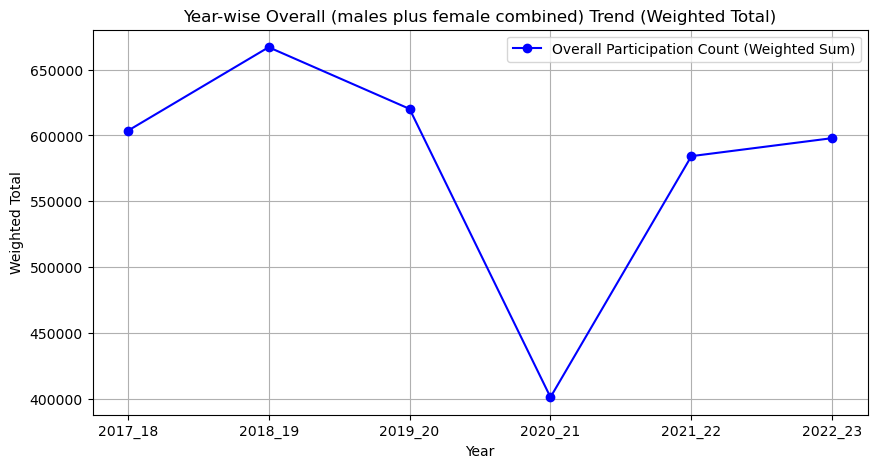

In [609]:
plot_yoy_als_trend()

# Function 11: plot_weighted_gender_trend() for ALS

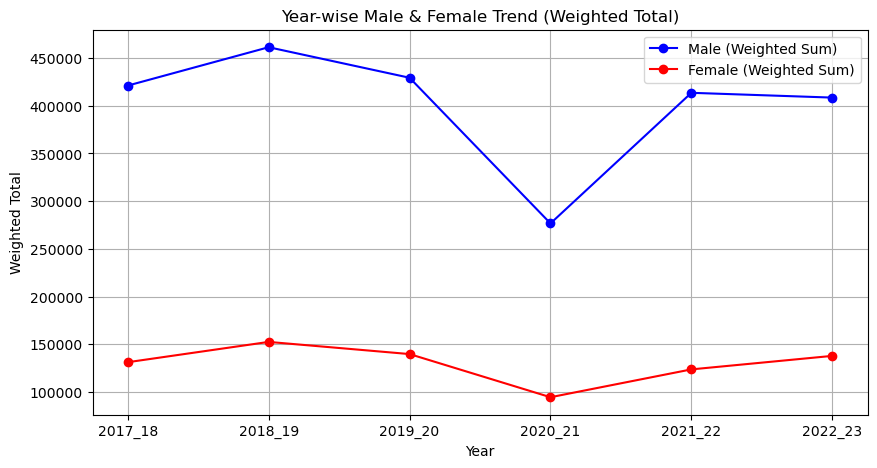

Year     Total_Male   Total_Female
0  2017_18  421189.506323  131164.577913
1  2018_19  461418.838216  152442.385922
2  2019_20  429403.122846  139686.932545
3  2020_21  276682.820827   94451.330040
4  2021_22  413625.528471  123635.849298
5  2022_23  408603.791150  137795.938864

In [613]:
import matplotlib.pyplot as plt

# Function to create year-wise line plot for Male & Female trends
def plot_weighted_gender_trend():
    years = ["2017_18", "2018_19", "2019_20", "2020_21", "2021_22","2022_23"]

    male_sums = [
        df_2017_18_male["weighted_total"].sum(),
        df_2018_19_male["weighted_total"].sum(),
        df_2019_20_male["weighted_total"].sum(),
        df_2020_21_male["weighted_total"].sum(),
        df_2021_22_male["weighted_total"].sum(),
        df_2022_23_male["weighted_total"].sum()
    ]

    female_sums = [
        df_2017_18_female["weighted_total"].sum(),
        df_2018_19_female["weighted_total"].sum(),
        df_2019_20_female["weighted_total"].sum(),
        df_2020_21_female["weighted_total"].sum(),
        df_2021_22_female["weighted_total"].sum(),
        df_2022_23_female["weighted_total"].sum()

    ]

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(years, male_sums, marker='o', linestyle='-', label="Male (Weighted Sum)", color='blue')
    plt.plot(years, female_sums, marker='o', linestyle='-', label="Female (Weighted Sum)", color='red')

    plt.xlabel("Year")
    plt.ylabel("Weighted Total")
    plt.title("Year-wise Male & Female Trend (Weighted Total)")
    plt.legend()
    plt.grid(True)

    plt.show()
    return pd.DataFrame({
        "Year": years,
        "Total_Male": male_sums,
        "Total_Female": female_sums
    })


plot_weighted_gender_trend()


# Function 12: Total RFU y-o-y participation

In [705]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_total_participation(dfs, years, title="Total Participation (Male + Female) Over Years"):
    """
    Plots total (male + female) participation per year.

    Parameters:
    dfs (list of pd.DataFrame): List of yearly DataFrames.
    years (list): Corresponding year labels.
    title (str): Plot title.
    """

    total_combined = []

    for df in dfs:
        male_cols = [col for col in df.columns if col.endswith('M')]
        female_cols = [col for col in df.columns if col.endswith('F')]

        male_total = df[male_cols].sum().sum()
        female_total = df[female_cols].sum().sum()
        total_combined.append(male_total + female_total)

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.plot(years, total_combined, marker='^', linestyle='--', color='purple', label='Total (M + F)')
    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel("Total Participants")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()



# Function 13: Genderwise yoy RFU participation

In [571]:
#copy
import matplotlib.pyplot as plt
import pandas as pd

def yoy_rfu_plot(dfs, years, title="Year-wise Participation by Gender for RFU(U17-U17)"):
    """
    Computes total male and female participation per year safely (avoiding double counting)
    and plots their trend.

    Parameters:
    dfs (list of pd.DataFrame): List of yearly DataFrames.
    years (list): Corresponding year labels.
    title (str): Title of the plot.

    Returns:
    pd.DataFrame: Summary DataFrame with total male and female counts per year.
    """

    total_males = []
    total_females = []

    for df in dfs:
        # Filter only columns ending with 'M' or 'F' and NOT starting with 'count_col'
        male_cols = [col for col in df.columns if col.endswith('M')]
        female_cols = [col for col in df.columns if col.endswith('F')]

        male_total = df[male_cols].sum().sum()                        
        female_total = df[female_cols].sum().sum()                    
       
        total_males.append(male_total)
        total_females.append(female_total)

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.plot(years, total_males, marker='o', label='Male')
    plt.plot(years, total_females, marker='s', label='Female')
    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel("Total Participants")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Summary table
    return pd.DataFrame({
        "Year": years,
        "Total_Male": total_males,
        "Total_Female": total_females
    })


In [709]:
df1 = df1.iloc[:-1, :-7] # This step is done to filter out age 18 plus entries
df2 = df2.iloc[:-1, :-7]
df3 = df3.iloc[:-1, :-7]
df4 = df4.iloc[:-1, :-7]
df5 = df5.iloc[:-1, :-7]

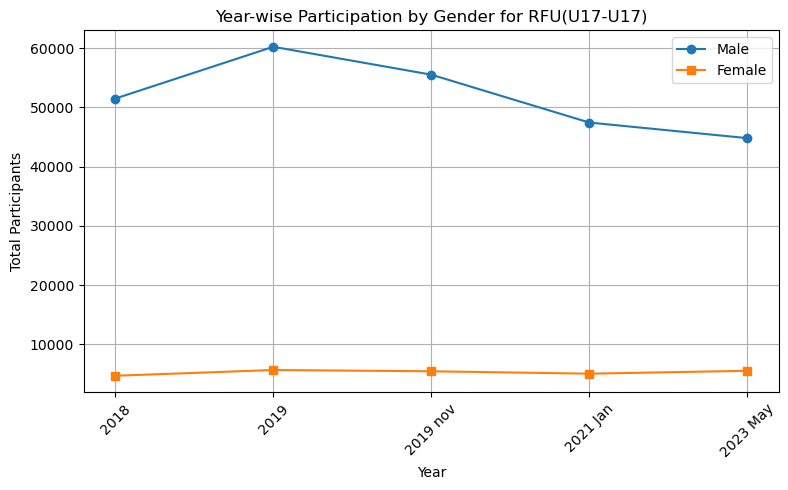

Year  Total_Male  Total_Female
0      2018       51470          4711
1      2019       60208          5680
2  2019 nov       55504          5469
3  2021 Jan       47425          5063
4  2023 May       44796          5548

In [711]:
'''
Years 2011, 2016,2017....2023
'''
dfs = [df1, df2, df3, df4, df5]
# for df in dfs:
#     df.drop('Unnamed: 32', axis=1, inplace=True)
    
years = ["2018", "2019", "2019 nov", "2021 Jan", "2023 May"]
yoy_rfu_plot(dfs, years)

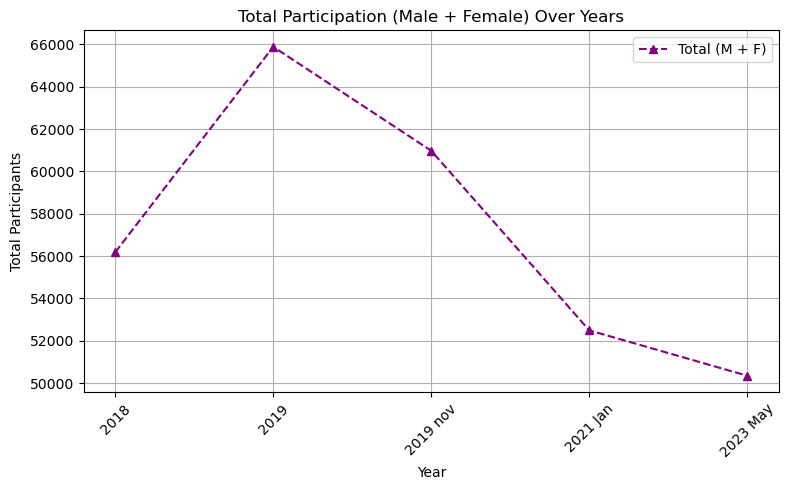

In [713]:
plot_total_participation(dfs, years)

# Function 14: group_by_columns()

In [303]:
import pandas as pd

def group_by_columns(df, years, groupby_cols, count_col):

    grouped_data = {}

    for df, year in zip(df, years):
        grouped_df = df.groupby(groupby_cols)[count_col].sum()
        grouped_data[year] = grouped_df.copy()  # Ensure a copy is stored
    df_1=pd.DataFrame(grouped_data)
    return df_1


# Making ALS Data Ready for plotting

In [187]:
weighted_column="weighted_total"

In [219]:
datasets = [df_2017_18, df_2018_19, df_2019_20, df_2020_21, df_2021_22, df_2022_23]
years = ["2017-18", "2018-19", "2019-20", "2020-21", "2021-22", "2022-23"]

# List of datasets
male_datasets = [df_2017_18_male, df_2018_19_male, df_2019_20_male, df_2020_21_male, df_2021_22_male, df_2022_23_male]
years = ["2017-18", "2018-19", "2019-20", "2020-21", "2021-22", "2022-23"]

# List of datasets
female_datasets = [df_2017_18_female, df_2018_19_female, df_2019_20_female, df_2020_21_female, df_2021_22_female, df_2022_23_female]
years = ["2017-18", "2018-19", "2019-20", "2020-21", "2021-22", "2022-23"]

In [221]:
'''
Implementing Function 10
'''
weighted_column="weighted_total"
regionwise_males=group_by_columns(male_datasets, years, groupby_cols=['Region','CSP'], count_col=weighted_column)
regionwise_females=group_by_columns(female_datasets, years, groupby_cols=['Region','CSP'], count_col=weighted_column)
regionwise_overall=group_by_columns(datasets, years, groupby_cols=['Region','CSP'], count_col=weighted_column)

In [134]:
for year, df in zip(years, datasets):
    total = df['weighted_total'].sum()
    print(f"Dataset {year}: {total:,.2f}")

for year, df in zip(years, male_datasets):
    total = df['weighted_total'].sum()
    print(f"Dataset {year} (Male): {total:,.2f}")

for year, df in zip(years, female_datasets):
    total = df['weighted_total'].sum()
    print(f"Dataset {year} (Female): {total:,.2f}")


Dataset 2017-18: 603,500.58
Dataset 2018-19: 667,019.15
Dataset 2019-20: 620,144.84
Dataset 2020-21: 401,024.65
Dataset 2021-22: 584,242.34
Dataset 2022-23: 597,925.09
Dataset 2017-18 (Male): 421,189.51
Dataset 2018-19 (Male): 461,418.84
Dataset 2019-20 (Male): 429,403.12
Dataset 2020-21 (Male): 276,682.82
Dataset 2021-22 (Male): 413,625.53
Dataset 2022-23 (Male): 408,603.79
Dataset 2017-18 (Female): 131,164.58
Dataset 2018-19 (Female): 152,442.39
Dataset 2019-20 (Female): 139,686.93
Dataset 2020-21 (Female): 94,451.33
Dataset 2021-22 (Female): 123,635.85
Dataset 2022-23 (Female): 137,795.94


# Making RFU Data ready plotting

In [277]:
dfs = [df1, df2, df3, df4, df5]
# Loop through and add 'count_col' to each
for i, df in enumerate(dfs):
    count_cols = [col for col in df.columns if col.endswith("M") or col.endswith("F")]
    dfs[i]["count_col"] = df[count_cols].sum(axis=1)
    
for i, df in enumerate(dfs):
    count_colsm = [col for col in df.columns if col.endswith("M")]
    dfs[i]["count_col_m"] = df[count_colsm].sum(axis=1)

for i, df in enumerate(dfs):
    count_colsf = [col for col in df.columns if col.endswith("F")]
    dfs[i]["count_col_f"] = df[count_colsf].sum(axis=1)

# Function 15: Plots for various modes for ALS and RFU

In [455]:
#DONE CODE
import matplotlib.pyplot as plt

def plot_category_trends(df, top_n=5, mode="largest", first_col=None, last_col=None,
                         xlabel="Year", ylabel="Participation Count", title="Participation Trends"):

    """
    Plots year-wise trends for the top OR bottom N categories based on selected analysis modes.
    Modes supported: largest, most_improved_custom, least_improved_custom,
                     cagr, lowest_cagr, recovery, weakest_recovery

    Parameters:
    df (DataFrame): Rows = categories, Columns = time points.
    top_n (int): Top N categories to plot.
    mode (str): Analysis mode.
    first_col (str): Starting year/column name.
    last_col (str): Ending year/column name.
    xlabel (str), ylabel (str), title (str): Plot labels.

    Returns:
    DataFrame: Selected categories and their summary values.
    """

    if mode == "largest":
        selected_categories = df.sum(axis=1).nlargest(top_n)
        title = f"Top {top_n} {title}"

    elif mode == "smallest":
        selected_categories = df.sum(axis=1).nsmallest(top_n)
        title = f"Top {top_n} {title}"

    elif mode == "most_improved_custom":
        improvement = df[last_col] - df[first_col]
        selected_categories = improvement.nlargest(top_n)
        title = f"Most Improved {top_n} {title}"

    elif mode == "least_improved_custom":
        improvement = df[last_col] - df[first_col]
        selected_categories = improvement.nsmallest(top_n)
        title = f"Least Improved {top_n} {title}"

    elif mode == "percent_growth":
        percent_growth = ((df[last_col] - df[first_col]) / df[first_col]) * 100
        selected_categories = percent_growth.nlargest(top_n)
        title = f"Top {top_n} Percent Growth {title}"
        
    elif mode == "percent_fall":
        percent_growth = ((df[last_col] - df[first_col]) / df[first_col]) * 100
        selected_categories = percent_growth.nsmallest(top_n)
        title = f"Top {top_n} Percent Fall {title}"

    elif mode == "recovery":
        middle_cols = df.loc[:, first_col:last_col].iloc[:, 1:-1].columns
        min_dip = df[middle_cols].min(axis=1)
        recovery_strength = df[last_col] - min_dip
        selected_categories = recovery_strength.nlargest(top_n)
        title = f"Top {top_n} Recovery after Dip {title}"

    elif mode == "weakest_recovery":
        middle_cols = df.loc[:, first_col:last_col].iloc[:, 1:-1].columns
        min_dip = df[middle_cols].min(axis=1)
        recovery_strength = df[last_col] - min_dip
        selected_categories = recovery_strength.nsmallest(top_n)
        title = f"Weakest {top_n} Recovery after Dip {title}"

    # ✅ Plot
    for category in selected_categories.index:
        plt.plot(df.columns, df.loc[category], marker='o', linestyle='-', label=category)

        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.xticks(rotation=45)
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize="small")
        plt.grid(True)

    return selected_categories.to_frame(name='Summary Value')


# Overall ALS Plots

In [165]:


'''
modes = [
    "largest", "smallest", "most_improved_custom", "least_improved_custom", "cagr",
    "lowest_cagr", "recovery", "weakest_recovery"
]
'''

'\nmodes = [\n    "largest", "smallest", "most_improved_custom", "least_improved_custom", "cagr",\n    "lowest_cagr", "recovery", "weakest_recovery"\n]\n'

In [223]:
first_col="2017-18"
last_col='2022-23'

C:\Users\Atharva Atul Joshi\AppData\Local\Temp\ipykernel_5440\1991798060.py:68: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(df.columns, df.loc[category], marker='o', linestyle='-', label=category)


Summary Value
Region                   CSP                                       
London                   London                       428622.250903
Yorkshire and the Humber West Yorkshire               200591.603836
North West               Greater Manchester           165367.784170
East                     Greater Essex                160772.957761
South East               Hampshire and Isle of Wight  121211.095351

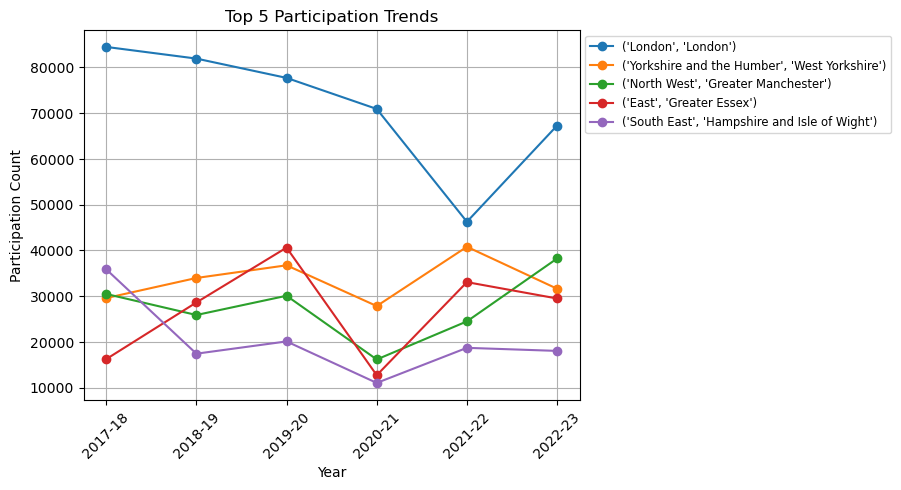

In [461]:
plot_category_trends(regionwise_overall, first_col="2017-18",last_col='2022-23',mode='largest')

C:\Users\Atharva Atul Joshi\AppData\Local\Temp\ipykernel_5440\1991798060.py:68: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(df.columns, df.loc[category], marker='o', linestyle='-', label=category)


Summary Value
Region     CSP                          
North East Durham           11227.644799
           Northumberland   11435.045878
East       Norfolk          29251.933854
           Suffolk          32209.747847
South West Dorset           35279.988592

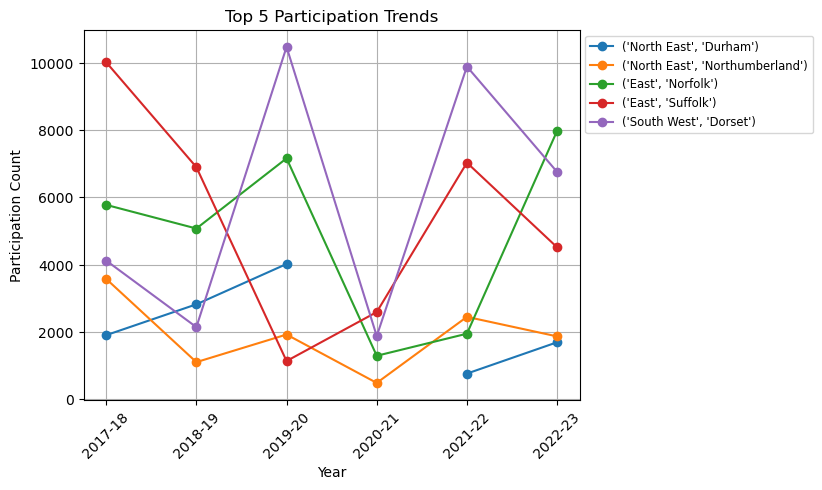

In [463]:
plot_category_trends(regionwise_overall, first_col="2017-18",last_col='2022-23',mode='smallest')

C:\Users\Atharva Atul Joshi\AppData\Local\Temp\ipykernel_5440\1991798060.py:68: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(df.columns, df.loc[category], marker='o', linestyle='-', label=category)


Summary Value
Region        CSP                                                 
West Midlands Black Country                           17288.234258
South West    Wiltshire & Swindon                     13275.351247
East          Greater Essex                           13258.021929
West Midlands Shropshire and Telford and the Wrekin   10222.521900
South East    Surrey                                   9138.232150

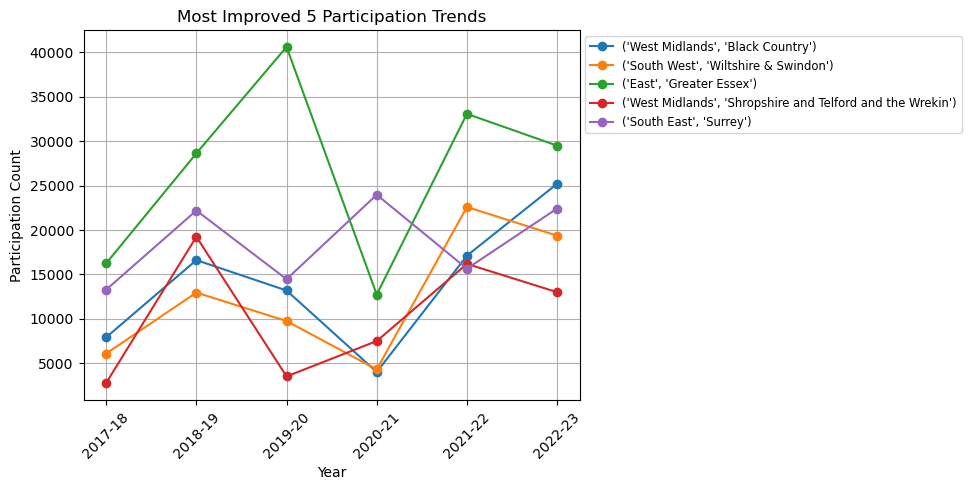

In [467]:
plot_category_trends(regionwise_overall, first_col="2017-18",last_col='2022-23',mode='most_improved_custom')

C:\Users\Atharva Atul Joshi\AppData\Local\Temp\ipykernel_5440\1991798060.py:68: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(df.columns, df.loc[category], marker='o', linestyle='-', label=category)


Summary Value
Region        CSP                                             
South East    Hampshire and Isle of Wight        -17837.273966
London        London                             -17190.380087
West Midlands Coventry, Solihull & Warwickshire  -14228.653251
North West    Cheshire                           -10320.199462
South East    Sussex                              -9854.865787

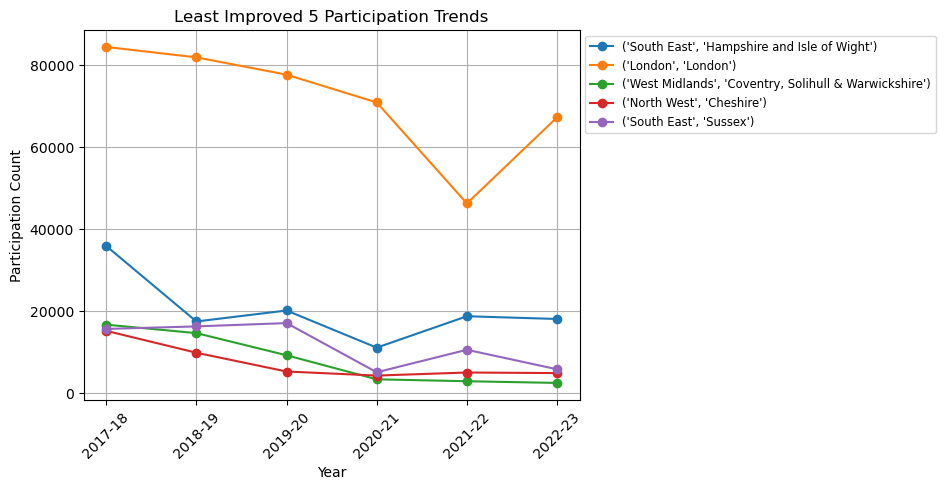

In [469]:
plot_category_trends(regionwise_overall, first_col="2017-18",last_col='2022-23', mode='least_improved_custom')

C:\Users\Atharva Atul Joshi\AppData\Local\Temp\ipykernel_5440\1991798060.py:68: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(df.columns, df.loc[category], marker='o', linestyle='-', label=category)


Summary Value
Region        CSP                                                 
West Midlands Shropshire and Telford and the Wrekin     369.485564
              Black Country                             218.634641
South West    Wiltshire & Swindon                       218.324871
              Bristol and West of England               109.071576
East          Greater Essex                              81.647676

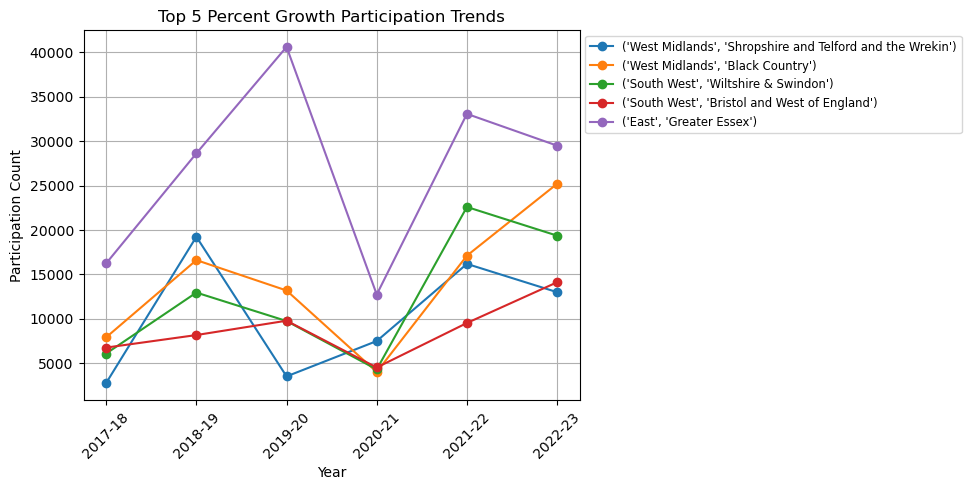

In [615]:
plot_category_trends(regionwise_overall,  first_col="2017-18",last_col='2022-23',  mode='percent_growth')

C:\Users\Atharva Atul Joshi\AppData\Local\Temp\ipykernel_5440\1991798060.py:68: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(df.columns, df.loc[category], marker='o', linestyle='-', label=category)


Summary Value
Region        CSP                                             
West Midlands Coventry, Solihull & Warwickshire     -85.440063
              Birmingham                            -77.721132
North West    Cheshire                              -68.132779
South East    Sussex                                -63.138169
West Midlands Staffordshire and Stoke-on-Trent      -60.749269

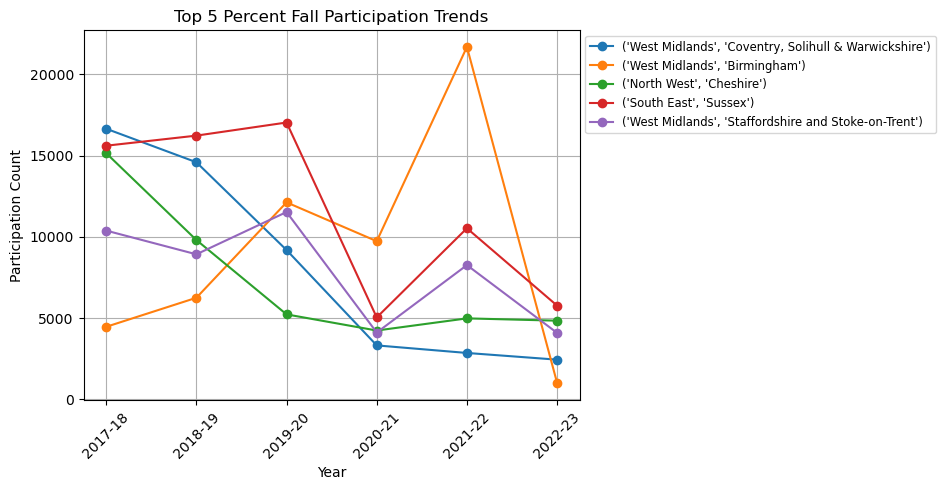

In [473]:
plot_category_trends(regionwise_overall,  first_col="2017-18",last_col='2022-23',  mode='percent_fall')

# Overall RFU Plots

In [293]:
df5.groupby(['Constituent Body'])['count_col_m'].sum()

Constituent Body
Army Rugby Union (CB)                               0
Berkshire County RFU (CB)                        2809
Buckinghamshire County RFU (CB)                  2679
Cambridge University RFU (CB)                       0
Cheshire RFU (CB)                                5786
Cornwall RFU (CB)                                3178
Cumbria RFU Ltd. (CB)                            1553
Devon RFU (CB)                                   6026
Dorset & Wilts RFU (CB)                          4771
Durham County Rugby Union (CB)                   3155
East Midlands Rugby Union (CB)                   5070
Eastern Counties Rugby Union (CB)                4821
Essex County RFU (CB)                            5241
Gloucestershire RFU (CB)                         6866
Hampshire RFU Ltd. (CB)                          5478
Hertfordshire RFU (CB)                           4107
Kent County Rugby Football Union Limited (CB)    8079
Lancashire County RFU (CB)                       6646
Leicestersh

In [291]:
df5

Area        Region                     Constituent Body  \
0           Area 1  London North              Dorset & Wilts RFU (CB)   
1           Area 1  London North              Dorset & Wilts RFU (CB)   
2           Area 1  London North              Dorset & Wilts RFU (CB)   
3           Area 1  London North              Dorset & Wilts RFU (CB)   
4           Area 1  London North              Dorset & Wilts RFU (CB)   
...            ...           ...                                  ...   
1853  Universities      Students  Students' Rugby Football Union (CB)   
1854  Universities      Students  Students' Rugby Football Union (CB)   
1855  Universities      Students  Students' Rugby Football Union (CB)   
1856  Universities      Students  Students' Rugby Football Union (CB)   
1857  Universities      Students  Students' Rugby Football Union (CB)   

                                             Club  U7M  U7F  U8M  U8F  U9M  \
0           14 Regiment/Royal School of Artillery    0    0    0    0    0   
1                         Aldbourne Dabchicks RFC    0    0    0    0    0   
2                                    Amesbury RFC    4    0    8    2   11   
3     Anglo-European College Of Chiropractors RFC    0    0    0    0    0   
4                                   Blandford RFC    3    0    6    0    6   
...                                           ...  ...  ...  ...  ...  ...   
1853              University of Wolverhampton RFC    0    0    0    0    0   
1854                  University of Worcester RFC    0    0    0    0    0   
1855                       University of York RFC    0    0    0    0    0   
1856             Writtle Agricultural College RFC    0    0    0    0    0   
1857                  York St John University RFC    0    0    0    0    0   

      U9F  ...  U14M  U14F  U15M  U15F  U16M  U16F  U17M  count_col  \
0       0  ...     0     0     0     0     0     0     0          0   
1       0  ...     0     0     0     0     0     0     0          0   
2       0  ...     0     1     2     0     2     2    17         58   
3       0  ...     0     0     0     0     0     0     0          0   
4       0  ...     0     0     1     0     0     0     2         53   
...   ...  ...   ...   ...   ...   ...   ...   ...   ...        ...   
1853    0  ...     0     0     0     0     0     0     0          0   
1854    0  ...     0     0     0     0     0     0     0          0   
1855    0  ...     0     0     0     0     0     0     0          0   
1856    0  ...     0     0     0     0     0     0     0          0   
1857    0  ...     0     0     0     0     0     0     0          0   

      count_col_m  count_col_f  
0               0            0  
1               0            0  
2              53            5  
3               0            0  
4              51            2  
...           ...          ...  
1853            0            0  
1854            0            0  
1855            0            0  
1856            0            0  
1857            0            0  

[1858 rows x 28 columns]

In [475]:
dfs = [df1, df2, df3, df4, df5]
years = ["2018", "2019", "2019 nov", "2021 Jan", "2023 May"]

In [477]:
males_regionwise_rfu=group_by_columns(dfs, years, groupby_cols=['Constituent Body'], count_col="count_col_m")
females_regionwise_rfu=group_by_columns(dfs, years, groupby_cols=['Constituent Body'], count_col="count_col_f")
overall_regionwise_rfu=group_by_columns(dfs, years, groupby_cols=['Constituent Body'], count_col="count_col")

In [479]:
males_regionwise_rfu_nonzero_filtered = males_regionwise_rfu[(males_regionwise_rfu != 0).any(axis=1)]
males_regionwise_rfu_zero_filtered=males_regionwise_rfu[(males_regionwise_rfu == 0).any(axis=1)]

In [481]:
females_regionwise_rfu_nonzero_filtered = females_regionwise_rfu[(females_regionwise_rfu != 0).any(axis=1)]
females_regionwise_rfu_zero_filtered= females_regionwise_rfu[(females_regionwise_rfu == 0).any(axis=1)]

In [483]:
overall_regionwise_rfu_nonzero_filtered = overall_regionwise_rfu[(overall_regionwise_rfu != 0).all(axis=1)]
overall_regionwise_rfu_zero_filtered= overall_regionwise_rfu[(overall_regionwise_rfu == 0).all(axis=1)]

Summary Value
Constituent Body                                            
Surrey Rugby (CB)                                      82863
Yorkshire RFU (CB)                                     62757
Kent County Rugby Football Union Limited (CB)          55953
North Midlands RFU (CB)                                47618
Gloucestershire RFU (CB)                               45141

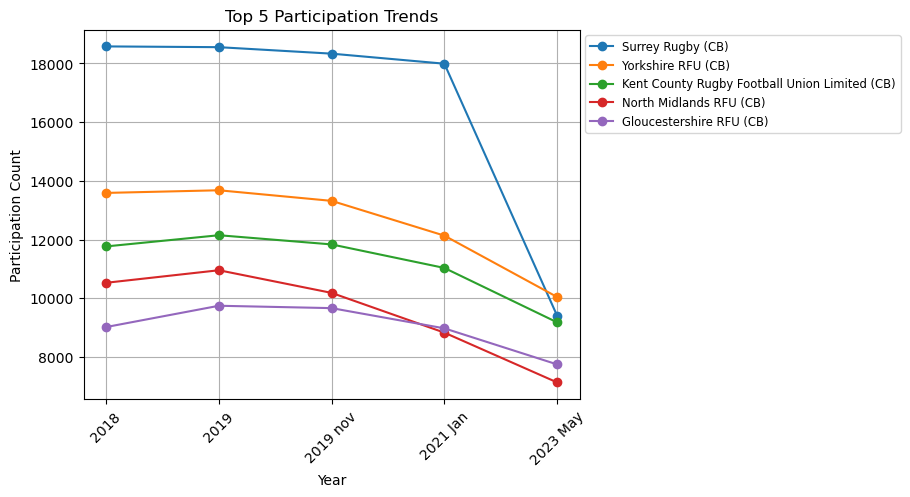

In [487]:
plot_category_trends(overall_regionwise_rfu_nonzero_filtered, first_col='2018', last_col='2023 May', mode='largest')

Summary Value
Constituent Body                              
Royal Navy Rugby Union                    2046
Cumbria RFU Ltd. (CB)                    11583
Berkshire County RFU (CB)                15950
Northumberland Rugby Union (CB)          17436
Staffordshire County RFU (CB)            17789
Oxfordshire RFU (CB)                     18293
Buckinghamshire County RFU (CB)          18500
Cornwall RFU (CB)                        19473

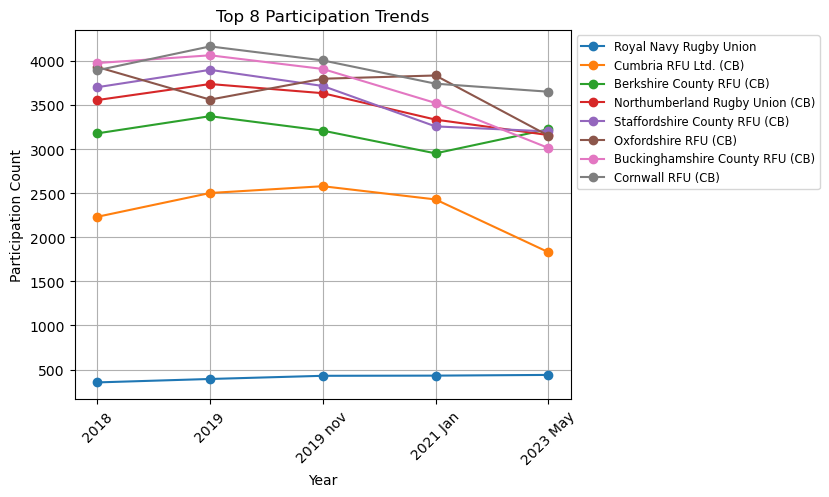

In [625]:
plot_category_trends(overall_regionwise_rfu_nonzero_filtered, top_n=8, first_col='2018', last_col='2023 May', mode='smallest')

Summary Value
Constituent Body                                 
Devon RFU (CB)                                373
Royal Navy Rugby Union                         85
Berkshire County RFU (CB)                      46
Cornwall RFU (CB)                            -243
Notts, Lincs & Derbyshire RFU (CB)           -340

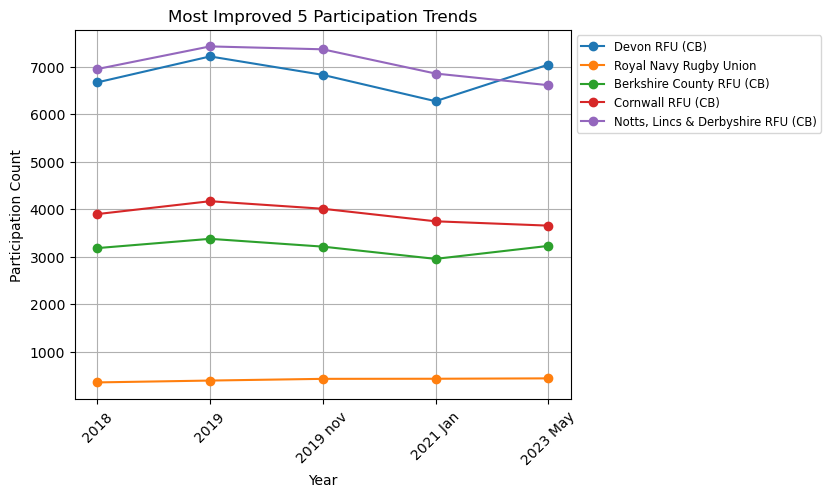

In [627]:
plot_category_trends(overall_regionwise_rfu_nonzero_filtered, first_col='2018', last_col='2023 May', mode='most_improved_custom')

Summary Value
Constituent Body                                            
Surrey Rugby (CB)                                      -9175
Yorkshire RFU (CB)                                     -3546
North Midlands RFU (CB)                                -3395
Hertfordshire RFU (CB)                                 -3393
Eastern Counties Rugby Union (CB)                      -2962
Middlesex County RFU (CB)                              -2863
Kent County Rugby Football Union Limited (CB)          -2587
Lancashire County RFU (CB)                             -1794

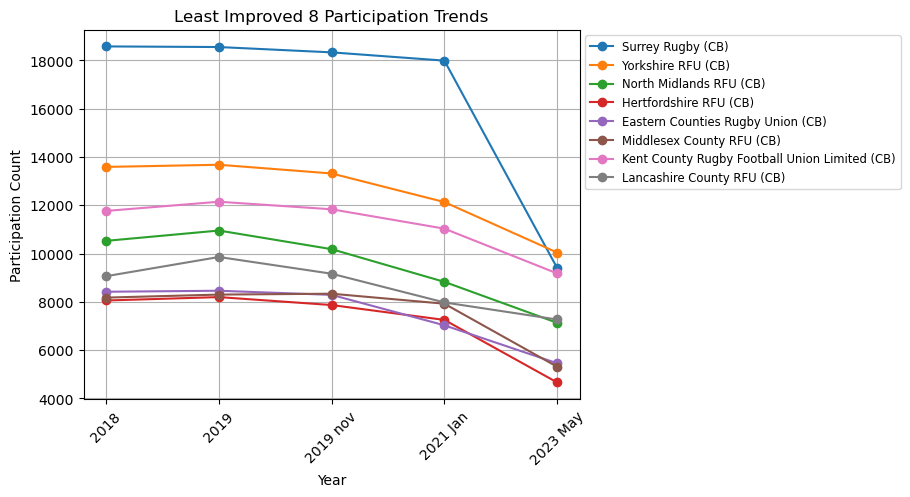

In [629]:
plot_category_trends(overall_regionwise_rfu_nonzero_filtered, top_n=8, first_col='2018', last_col='2023 May', mode='least_improved_custom')

Summary Value
Constituent Body                                 
Royal Navy Rugby Union                  24.011299
Devon RFU (CB)                           5.593042
Berkshire County RFU (CB)                1.446086
Notts, Lincs & Derbyshire RFU (CB)      -4.892086
Cornwall RFU (CB)                       -6.235566

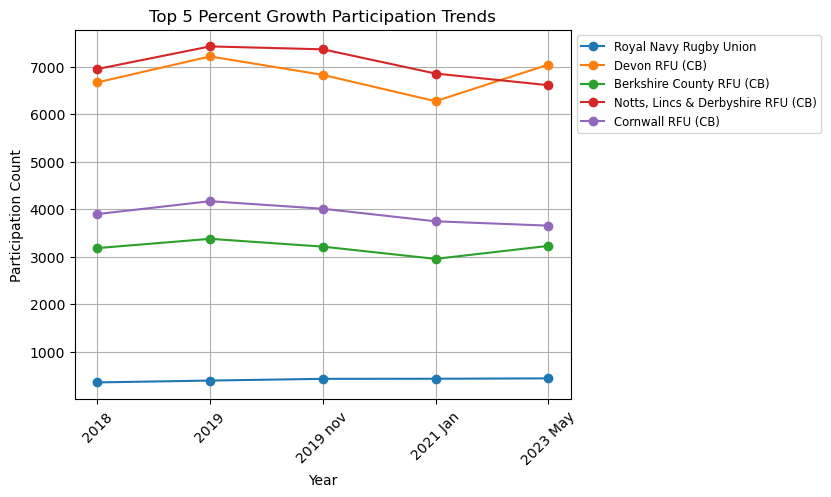

In [631]:
plot_category_trends(overall_regionwise_rfu_nonzero_filtered, first_col='2018', last_col='2023 May', mode='percent_growth')

Summary Value
Constituent Body                                
Surrey Rugby (CB)                     -49.381055
Hertfordshire RFU (CB)                -42.122905
Eastern Counties Rugby Union (CB)     -35.190686
Middlesex County RFU (CB)             -35.021407
North Midlands RFU (CB)               -32.253468
Sussex RFU Ltd. (CB)                  -27.537831
Yorkshire RFU (CB)                    -26.096556
Buckinghamshire County RFU (CB)       -24.202061

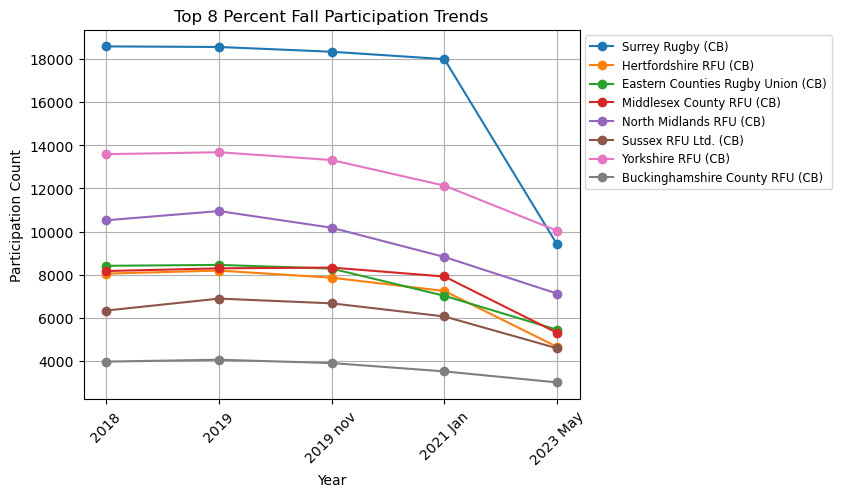

In [633]:
plot_category_trends(overall_regionwise_rfu_nonzero_filtered, top_n=8,  first_col='2018', last_col='2023 May', mode='percent_fall')

# ALS Plots (Males)

In [227]:
first_col="2017-18"
last_col='2022-23'

'''
modes = [
    "largest", "smallest", "most_improved_custom", "least_improved_custom", "cagr",
    "lowest_cagr", "recovery", "weakest_/'recovery"
]
'''

'\nmodes = [\n    "largest", "smallest", "most_improved_custom", "least_improved_custom", "cagr",\n    "lowest_cagr", "recovery", "weakest_/\'recovery"\n]\n'

C:\Users\Atharva Atul Joshi\AppData\Local\Temp\ipykernel_5440\2847066172.py:67: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(df.columns, df.loc[category], marker='o', linestyle='-', label=category)


Summary Value
Region                   CSP                                       
London                   London                       428622.250903
Yorkshire and the Humber West Yorkshire               200591.603836
North West               Greater Manchester           165367.784170
East                     Greater Essex                160772.957761
South East               Hampshire and Isle of Wight  121211.095351

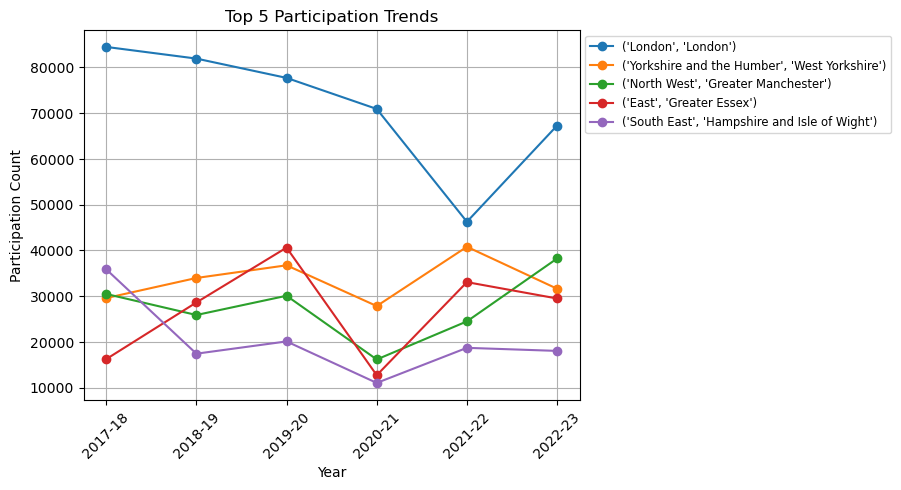

In [229]:
plot_category_trends(regionwise_males,  first_col="2017-18",last_col='2022-23',  mode='largest')

C:\Users\Atharva Atul Joshi\AppData\Local\Temp\ipykernel_5440\1991798060.py:68: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(df.columns, df.loc[category], marker='o', linestyle='-', label=category)


Summary Value
Region     CSP                          
North East Durham           11227.644799
           Northumberland   11435.045878
East       Norfolk          29251.933854
           Suffolk          32209.747847
South West Dorset           35279.988592

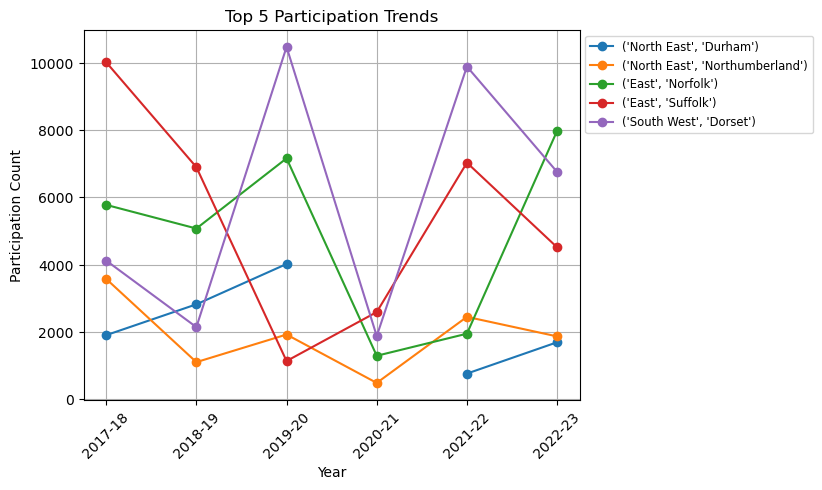

In [521]:
plot_category_trends(regionwise_males, first_col="2017-18",last_col='2022-23', mode='smallest')

C:\Users\Atharva Atul Joshi\AppData\Local\Temp\ipykernel_5440\1991798060.py:68: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(df.columns, df.loc[category], marker='o', linestyle='-', label=category)


Summary Value
Region        CSP                                                 
West Midlands Black Country                           17288.234258
South West    Wiltshire & Swindon                     13275.351247
East          Greater Essex                           13258.021929
West Midlands Shropshire and Telford and the Wrekin   10222.521900
South East    Surrey                                   9138.232150

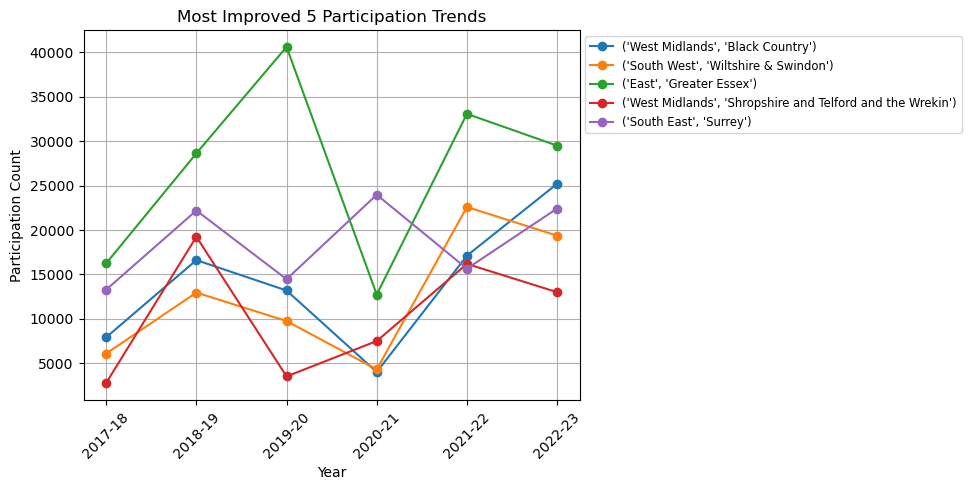

In [523]:
plot_category_trends(regionwise_males,first_col="2017-18",last_col='2022-23', mode='most_improved_custom')

C:\Users\Atharva Atul Joshi\AppData\Local\Temp\ipykernel_5440\1991798060.py:68: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(df.columns, df.loc[category], marker='o', linestyle='-', label=category)


Summary Value
Region        CSP                                             
South East    Hampshire and Isle of Wight        -17837.273966
London        London                             -17190.380087
West Midlands Coventry, Solihull & Warwickshire  -14228.653251
North West    Cheshire                           -10320.199462
South East    Sussex                              -9854.865787

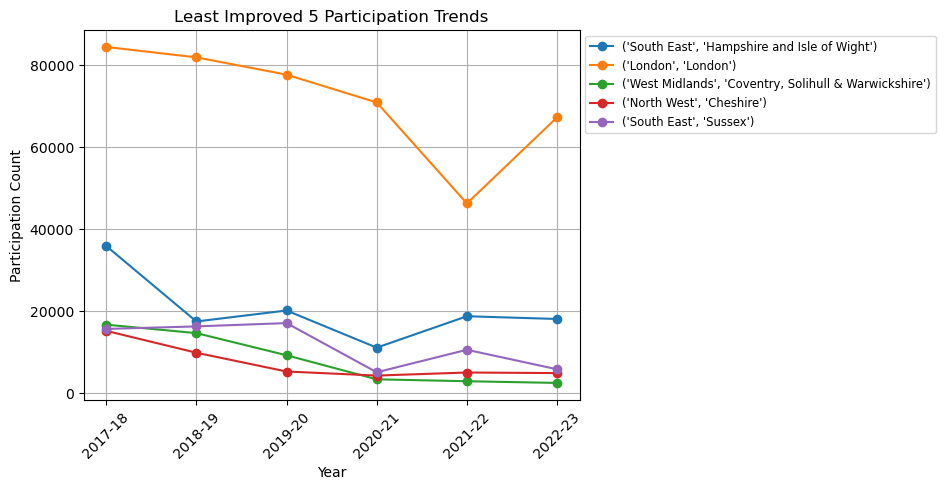

In [525]:
plot_category_trends(regionwise_males,first_col="2017-18",last_col='2022-23', mode='least_improved_custom')

C:\Users\Atharva Atul Joshi\AppData\Local\Temp\ipykernel_5440\1991798060.py:68: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(df.columns, df.loc[category], marker='o', linestyle='-', label=category)


Summary Value
Region        CSP                                                 
West Midlands Shropshire and Telford and the Wrekin     369.485564
              Black Country                             218.634641
South West    Wiltshire & Swindon                       218.324871
              Bristol and West of England               109.071576
East          Greater Essex                              81.647676

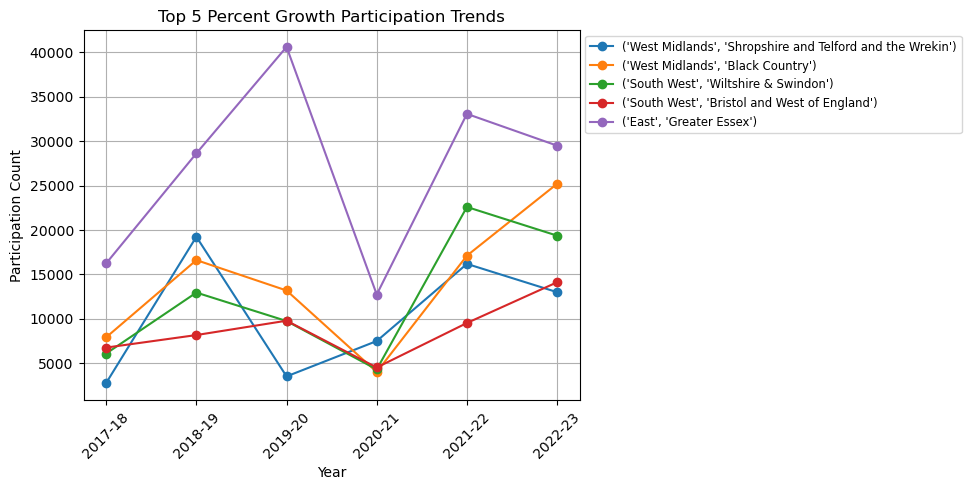

In [619]:
plot_category_trends(regionwise_males,first_col="2017-18",last_col='2022-23', mode='percent_growth')

C:\Users\Atharva Atul Joshi\AppData\Local\Temp\ipykernel_5440\1991798060.py:68: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(df.columns, df.loc[category], marker='o', linestyle='-', label=category)


Summary Value
Region        CSP                                             
West Midlands Coventry, Solihull & Warwickshire     -85.440063
              Birmingham                            -77.721132
North West    Cheshire                              -68.132779
South East    Sussex                                -63.138169
West Midlands Staffordshire and Stoke-on-Trent      -60.749269

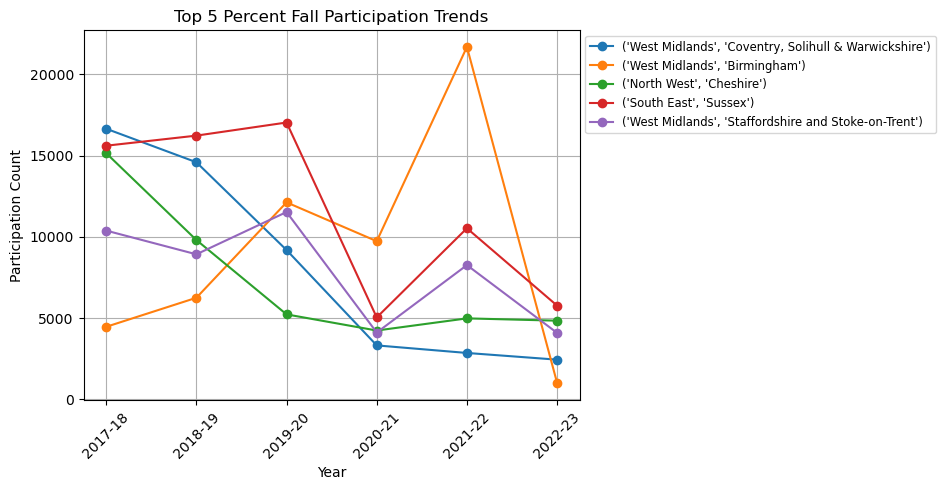

In [621]:
plot_category_trends(regionwise_males,first_col="2017-18",last_col='2022-23', mode='percent_fall')

# RFU Plots (Males)

In [895]:
'''
modes = [
    "largest", "smallest", "most_improved_custom", "least_improved_custom", "percent_growth",
    "percent_fall"
]
'''

'\nmodes = [\n    "largest", "smallest", "most_improved_custom", "least_improved_custom", "cagr",\n    "lowest_cagr", "recovery", "weakest_recovery"\n]\n'

Summary Value
Constituent Body                                            
Surrey Rugby (CB)                                      76626
Yorkshire RFU (CB)                                     56179
Kent County Rugby Football Union Limited (CB)          51194
North Midlands RFU (CB)                                43483
Gloucestershire RFU (CB)                               40772

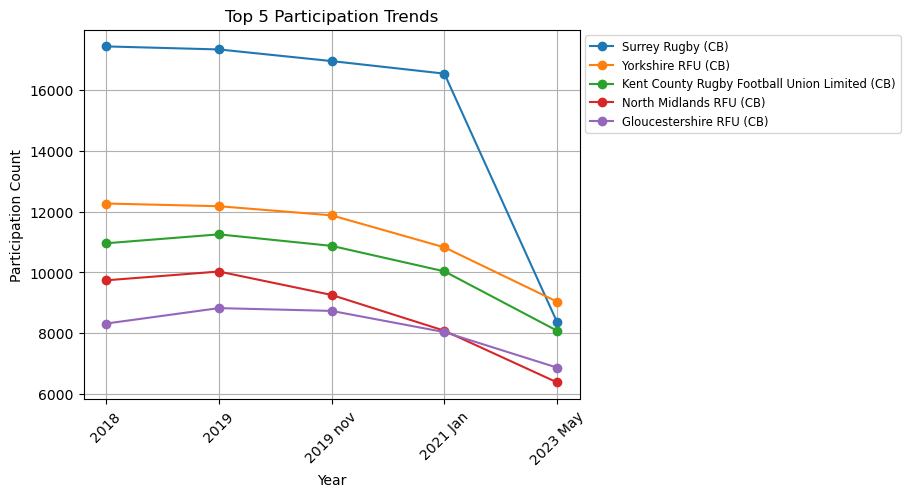

In [489]:
plot_category_trends(males_regionwise_rfu_nonzero_filtered,  first_col='2018', last_col='2023 May', mode='largest')

Summary Value
Constituent Body                                  
Students' Rugby Football Union (CB)              4
Army Rugby Union (CB)                          564
Royal Navy Rugby Union                        1864
Cumbria RFU Ltd. (CB)                        10342
Berkshire County RFU (CB)                    14725
Northumberland Rugby Union (CB)              15605
Staffordshire County RFU (CB)                15700
Buckinghamshire County RFU (CB)              16914

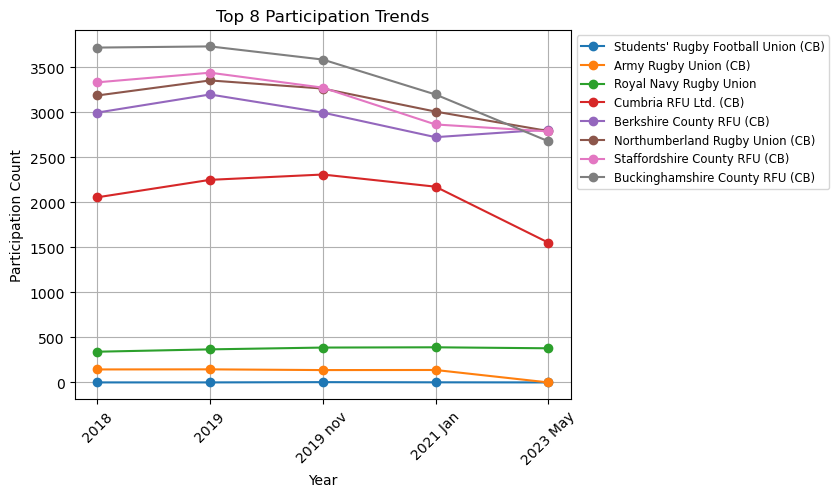

In [637]:
plot_category_trends(males_regionwise_rfu_nonzero_filtered, top_n=8,  first_col='2018', last_col='2023 May', mode='smallest')

Summary Value
Constituent Body                                  
Royal Navy Rugby Union                          38
Devon RFU (CB)                                  19
Students' Rugby Football Union (CB)              0
Army Rugby Union (CB)                         -144
Berkshire County RFU (CB)                     -188

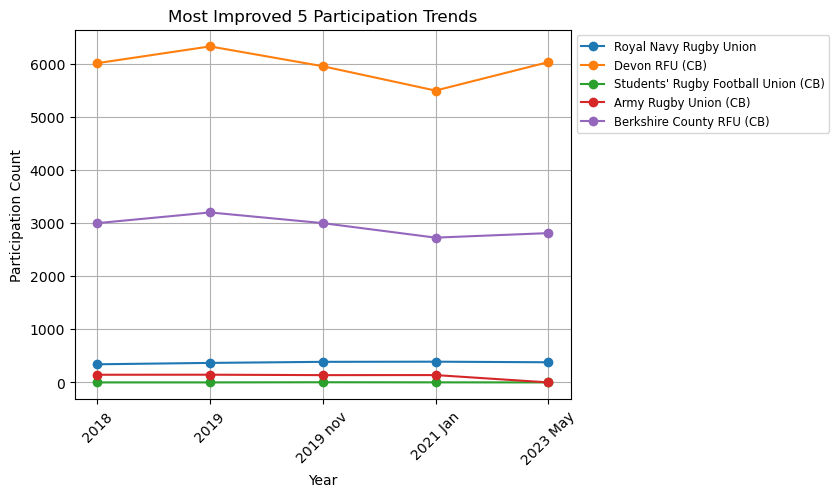

In [639]:
plot_category_trends(males_regionwise_rfu_nonzero_filtered,  first_col='2018', last_col='2023 May', mode='most_improved_custom')

Summary Value
Constituent Body                                            
Surrey Rugby (CB)                                      -9075
Hertfordshire RFU (CB)                                 -3462
North Midlands RFU (CB)                                -3360
Yorkshire RFU (CB)                                     -3231
Eastern Counties Rugby Union (CB)                      -3054
Middlesex County RFU (CB)                              -2938
Kent County Rugby Football Union Limited (CB)          -2879
Essex County RFU (CB)                                  -1916

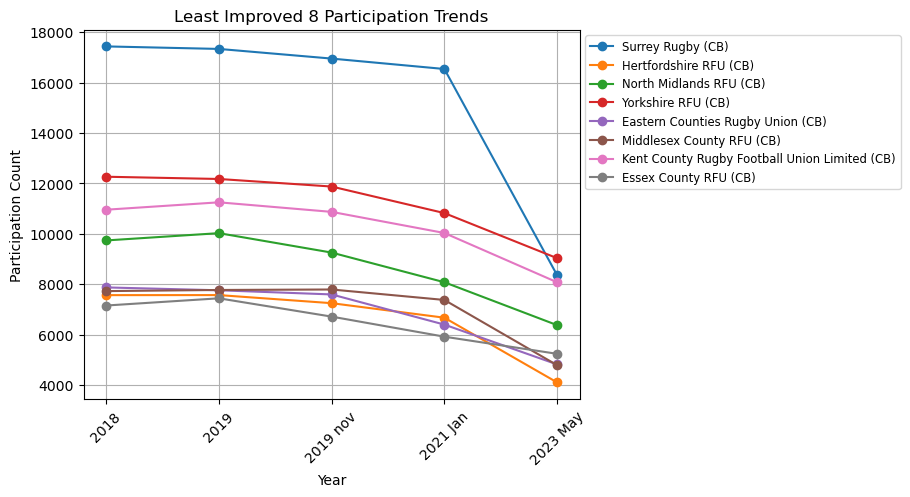

In [641]:
plot_category_trends(males_regionwise_rfu_nonzero_filtered, top_n=8, first_col='2018', last_col='2023 May', mode='least_improved_custom')

Summary Value
Constituent Body                                 
Royal Navy Rugby Union                  11.143695
Devon RFU (CB)                           0.316298
Berkshire County RFU (CB)               -6.272940
Notts, Lincs & Derbyshire RFU (CB)      -8.277579
Cornwall RFU (CB)                      -12.306843

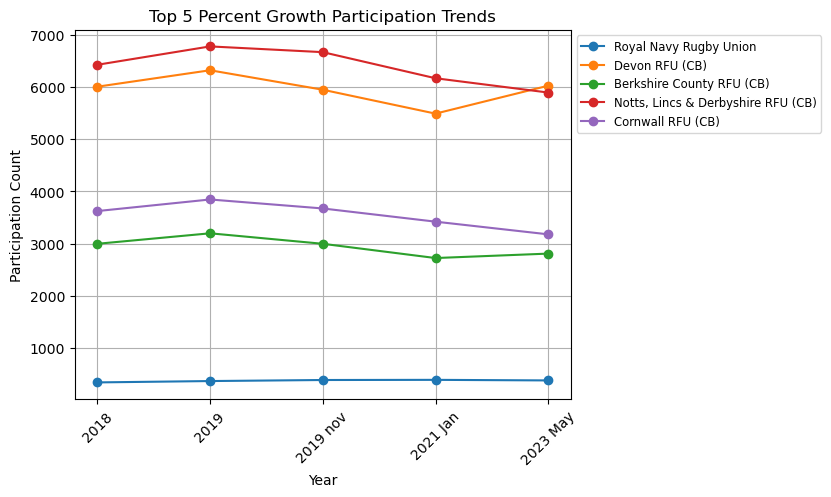

In [497]:
plot_category_trends(males_regionwise_rfu_nonzero_filtered, first_col='2018', last_col='2023 May', mode='percent_growth')

Summary Value
Constituent Body                                
Army Rugby Union (CB)                -100.000000
Surrey Rugby (CB)                     -52.047488
Hertfordshire RFU (CB)                -45.739199
Eastern Counties Rugby Union (CB)     -38.780952
Middlesex County RFU (CB)             -38.012680
North Midlands RFU (CB)               -34.500462
Sussex RFU Ltd. (CB)                  -32.483427
Buckinghamshire County RFU (CB)       -27.964507

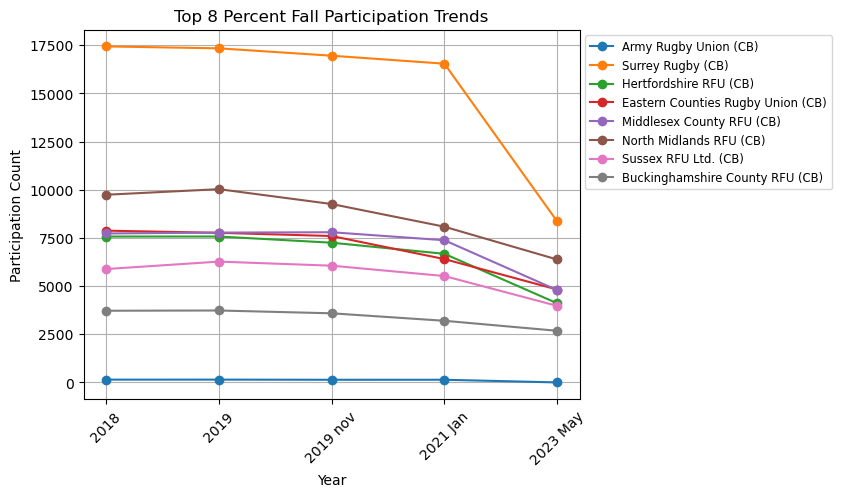

In [635]:
plot_category_trends(males_regionwise_rfu_nonzero_filtered, top_n=8, first_col='2018', last_col='2023 May', mode='percent_fall')

# ALS Plots (Females)

C:\Users\Atharva Atul Joshi\AppData\Local\Temp\ipykernel_5440\2847066172.py:67: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(df.columns, df.loc[category], marker='o', linestyle='-', label=category)


Summary Value
Region                   CSP                                       
London                   London                       361327.352044
Yorkshire and the Humber West Yorkshire               168964.572711
East                     Greater Essex                131276.847341
North West               Greater Manchester           127126.713406
South East               Hampshire and Isle of Wight  103171.426663

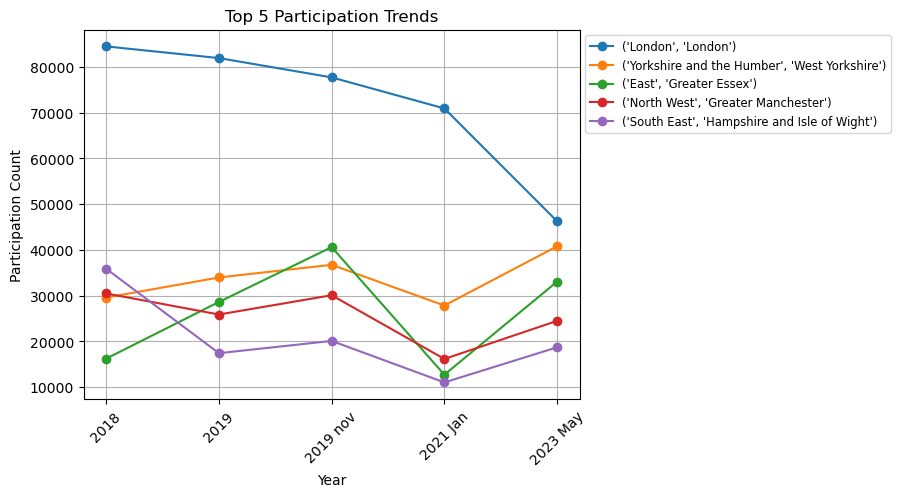

In [79]:
plot_category_trends(regionwise_females,  first_col="2017-18",last_col='2022-23',  mode='largest')

C:\Users\Atharva Atul Joshi\AppData\Local\Temp\ipykernel_5440\1991798060.py:68: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(df.columns, df.loc[category], marker='o', linestyle='-', label=category)


Summary Value
Region     CSP                          
North East Durham           11227.644799
           Northumberland   11435.045878
East       Norfolk          29251.933854
           Suffolk          32209.747847
South West Dorset           35279.988592

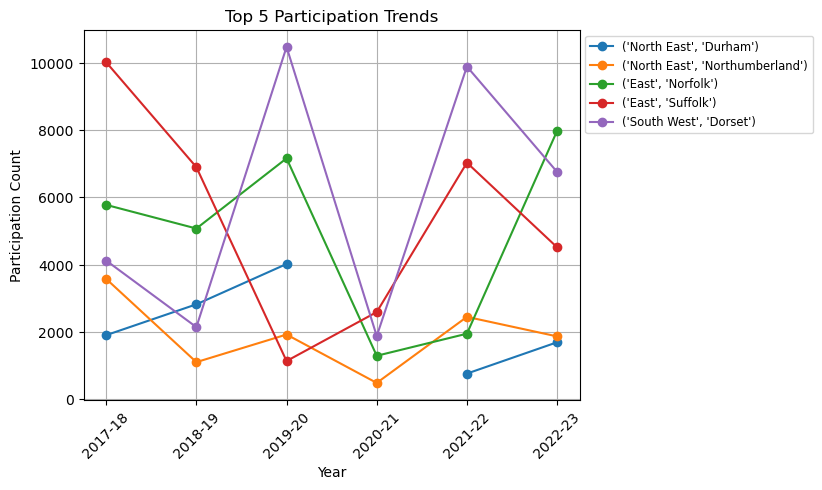

In [511]:
plot_category_trends(regionwise_females,  first_col="2017-18",last_col='2022-23',  mode='smallest')

C:\Users\Atharva Atul Joshi\AppData\Local\Temp\ipykernel_5440\1991798060.py:68: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(df.columns, df.loc[category], marker='o', linestyle='-', label=category)


Summary Value
Region        CSP                                                 
West Midlands Black Country                           17288.234258
South West    Wiltshire & Swindon                     13275.351247
East          Greater Essex                           13258.021929
West Midlands Shropshire and Telford and the Wrekin   10222.521900
South East    Surrey                                   9138.232150

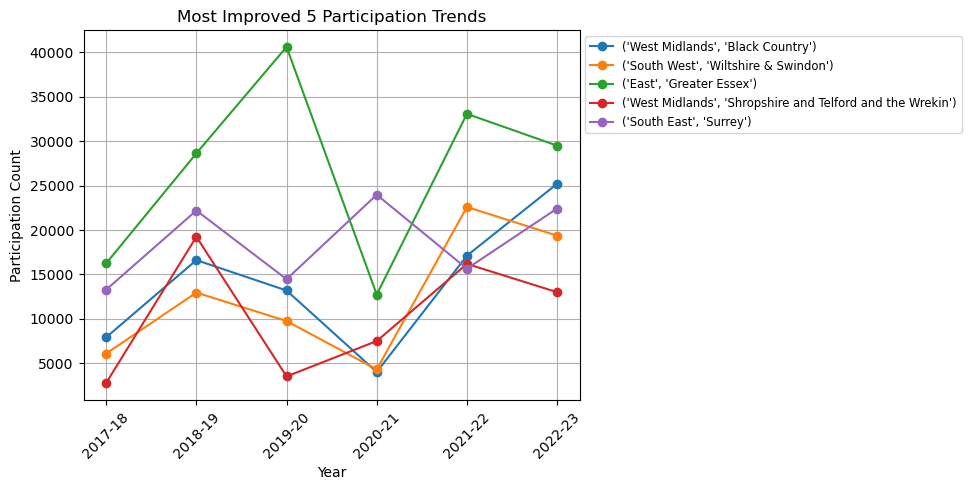

In [513]:
plot_category_trends(regionwise_females,  first_col="2017-18",last_col='2022-23',  mode='most_improved_custom')

C:\Users\Atharva Atul Joshi\AppData\Local\Temp\ipykernel_5440\1991798060.py:68: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(df.columns, df.loc[category], marker='o', linestyle='-', label=category)


Summary Value
Region        CSP                                             
South East    Hampshire and Isle of Wight        -17837.273966
London        London                             -17190.380087
West Midlands Coventry, Solihull & Warwickshire  -14228.653251
North West    Cheshire                           -10320.199462
South East    Sussex                              -9854.865787

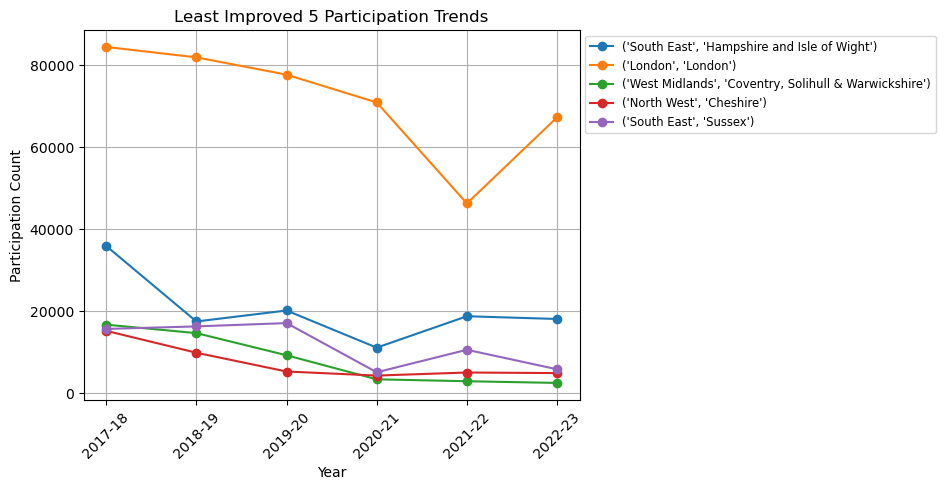

In [515]:
plot_category_trends(regionwise_females,  first_col="2017-18",last_col='2022-23',  mode='least_improved_custom')

C:\Users\Atharva Atul Joshi\AppData\Local\Temp\ipykernel_5440\1991798060.py:68: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(df.columns, df.loc[category], marker='o', linestyle='-', label=category)


Summary Value
Region        CSP                                                 
West Midlands Shropshire and Telford and the Wrekin     369.485564
              Black Country                             218.634641
South West    Wiltshire & Swindon                       218.324871
              Bristol and West of England               109.071576
East          Greater Essex                              81.647676

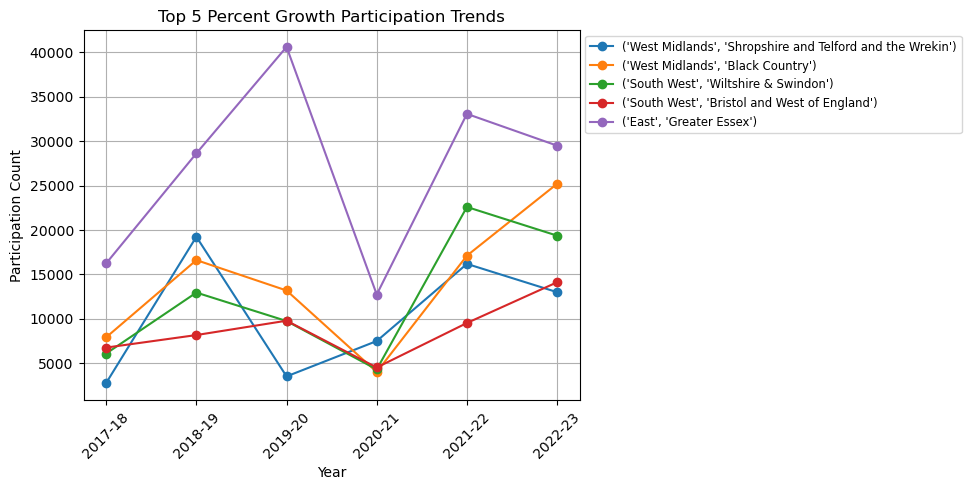

In [517]:
plot_category_trends(regionwise_females,  first_col="2017-18",last_col='2022-23',  mode='percent_growth')

C:\Users\Atharva Atul Joshi\AppData\Local\Temp\ipykernel_5440\1991798060.py:68: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(df.columns, df.loc[category], marker='o', linestyle='-', label=category)


Summary Value
Region        CSP                                             
West Midlands Coventry, Solihull & Warwickshire     -85.440063
              Birmingham                            -77.721132
North West    Cheshire                              -68.132779
South East    Sussex                                -63.138169
West Midlands Staffordshire and Stoke-on-Trent      -60.749269

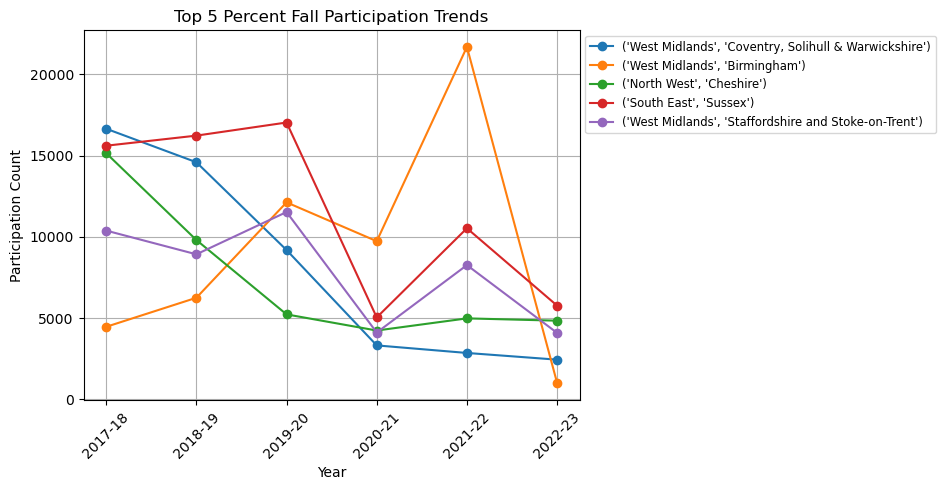

In [623]:
plot_category_trends(regionwise_females,  first_col="2017-18",last_col='2022-23',  mode='percent_fall')

# RFU Plots (Females)

Summary Value
Constituent Body                                            
Surrey Rugby (CB)                                       3784
Kent County Rugby Football Union Limited (CB)           2625
Yorkshire RFU (CB)                                      2446
Gloucestershire RFU (CB)                                2364
Somerset County RFU Limited(CB)                         2113

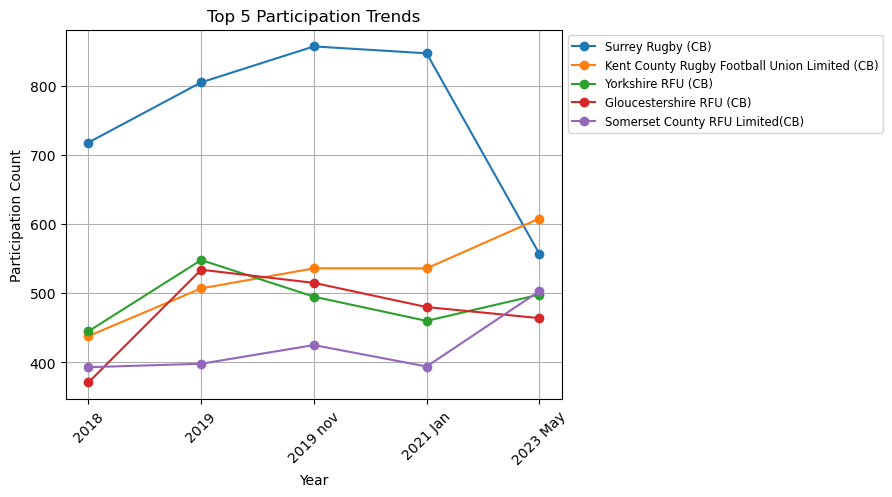

In [911]:
plot_category_trends(females_regionwise_rfu_nonzero_filtered, first_col='2018', last_col='2023 May', mode='largest')

Summary Value
Constituent Body                              
Army Rugby Union (CB)                      128
Royal Navy Rugby Union                     182
Berkshire County RFU (CB)                 1225
Cumbria RFU Ltd. (CB)                     1241
Oxfordshire RFU (CB)                      1299
Buckinghamshire County RFU (CB)           1586
Cornwall RFU (CB)                         1730
Northumberland Rugby Union (CB)           1831

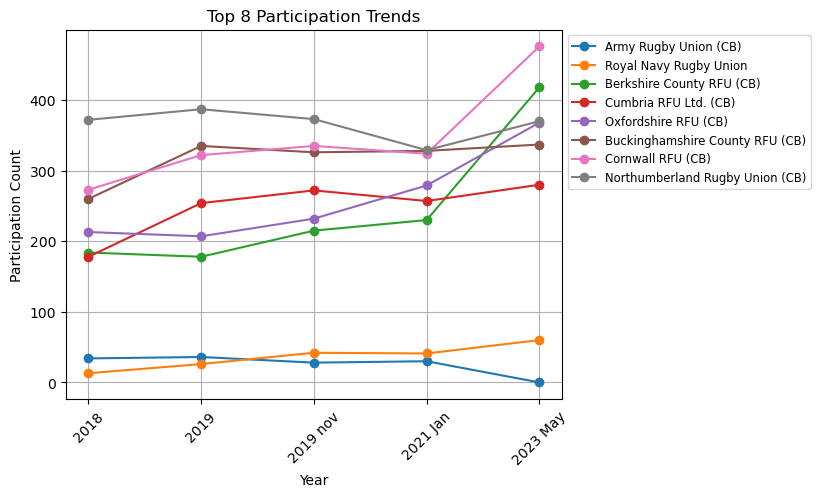

In [643]:
plot_category_trends(females_regionwise_rfu_nonzero_filtered, top_n=8, first_col='2018', last_col='2023 May', mode='smallest')

Summary Value
Constituent Body                                            
Devon RFU (CB)                                           354
Kent County Rugby Football Union Limited (CB)            292
Berkshire County RFU (CB)                                234
Cornwall RFU (CB)                                        203
Notts, Lincs & Derbyshire RFU (CB)                       192

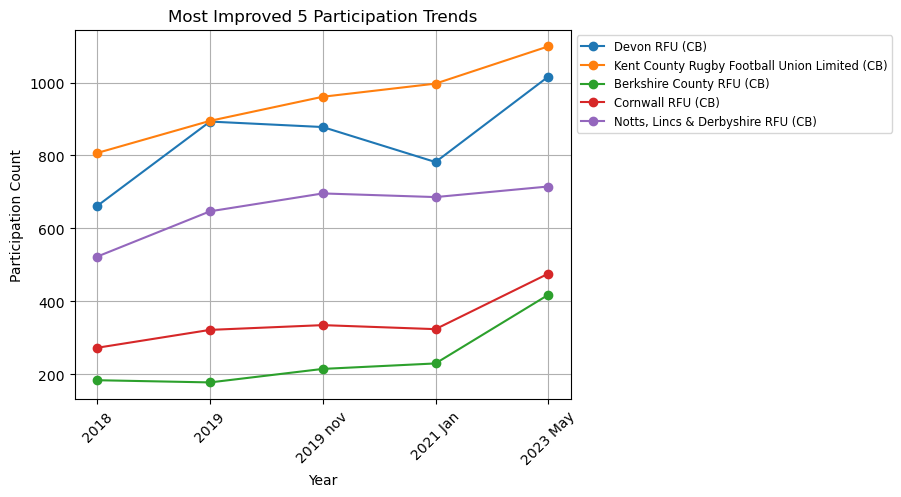

In [503]:
plot_category_trends(females_regionwise_rfu_nonzero_filtered, first_col='2018', last_col='2023 May', mode='most_improved_custom')

Summary Value
Constituent Body                              
Yorkshire RFU (CB)                        -315
Surrey Rugby (CB)                         -100
North Midlands RFU (CB)                    -35
Army Rugby Union (CB)                      -34
Northumberland Rugby Union (CB)             -2
Dorset & Wilts RFU (CB)                     35
Staffordshire County RFU (CB)               43
Royal Navy Rugby Union                      47

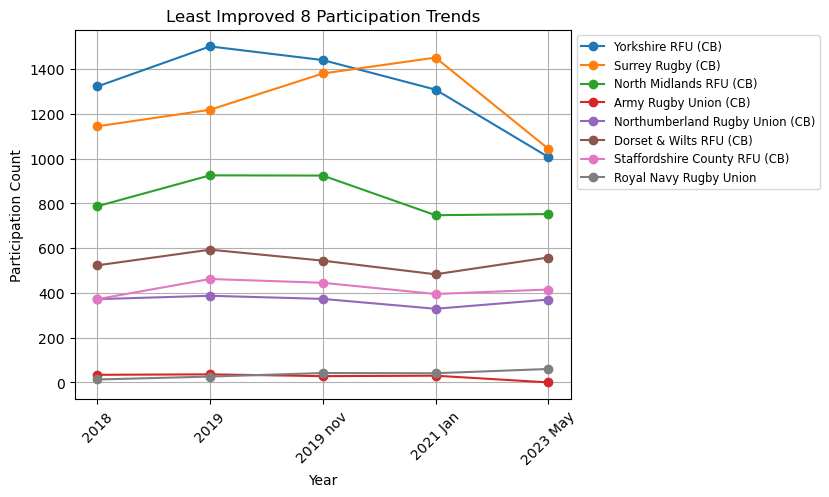

In [647]:
plot_category_trends(females_regionwise_rfu_nonzero_filtered, top_n=8, first_col='2018', last_col='2023 May', mode='least_improved_custom')

Summary Value
Constituent Body                        
Royal Navy Rugby Union        361.538462
Berkshire County RFU (CB)     127.173913
Cornwall RFU (CB)              74.358974
Oxfordshire RFU (CB)           72.769953
Cumbria RFU Ltd. (CB)          57.303371

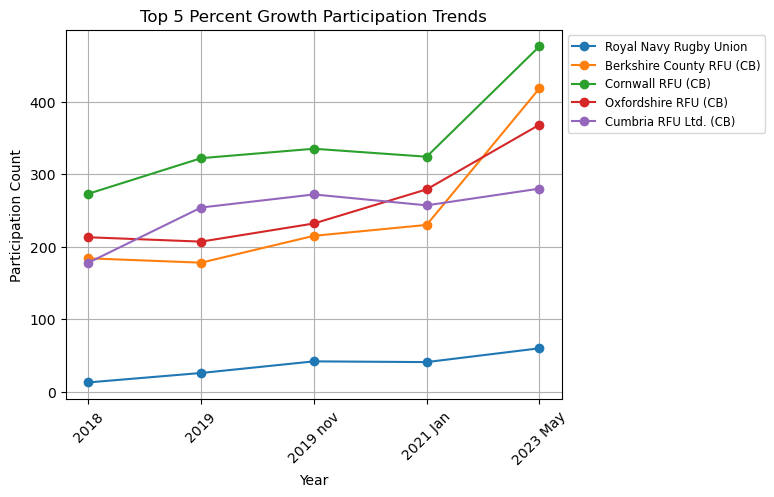

In [507]:
plot_category_trends(females_regionwise_rfu_nonzero_filtered, first_col='2018', last_col='2023 May', mode='percent_growth')

Summary Value
Constituent Body                              
Army Rugby Union (CB)              -100.000000
Yorkshire RFU (CB)                  -23.827534
Surrey Rugby (CB)                    -8.741259
North Midlands RFU (CB)              -4.447268
Northumberland Rugby Union (CB)      -0.537634
Dorset & Wilts RFU (CB)               6.692161
Lancashire County RFU (CB)            8.931699
Staffordshire County RFU (CB)        11.559140

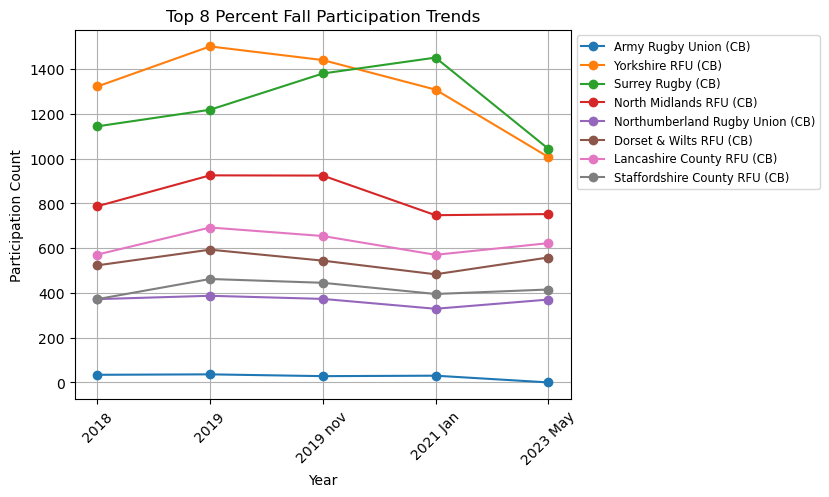

In [645]:
plot_category_trends(females_regionwise_rfu_nonzero_filtered, top_n=8, first_col='2018', last_col='2023 May', mode='percent_fall')

# Age-ALS-Overall

In [437]:
datasets = [df_2017_18, df_2018_19, df_2019_20, df_2020_21, df_2021_22, df_2022_23]
years = ["2017-18", "2018-19", "2019-20", "2020-21", "2021-22", "2022-23"]

In [441]:
agew_over=group_by_columns(datasets, years, groupby_cols=['Age'], count_col=sport_column)

Summary Value
Age                
12.0         8261.0
11.0         7678.0
13.0         7177.0
10.0         6482.0
9.0          5595.0

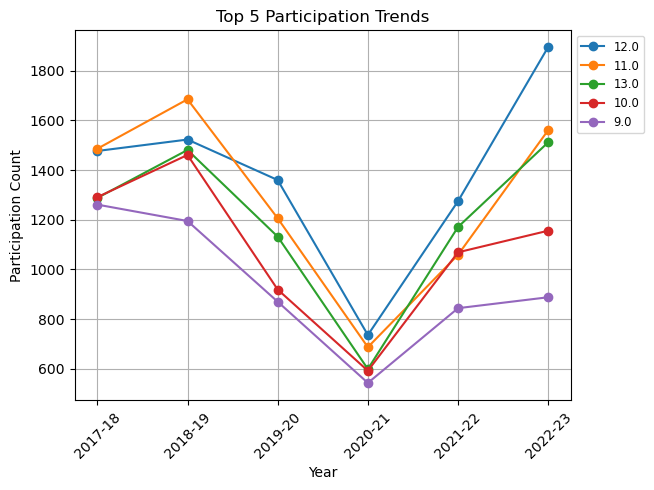

In [443]:
plot_category_trends(agew_over)

In [445]:
agew_over=group_by_columns(male_datasets, years, groupby_cols=['Age'], count_col=sport_column)

Summary Value
Age                
12.0         5818.0
11.0         5153.0
13.0         4914.0
10.0         4186.0
14.0         3676.0

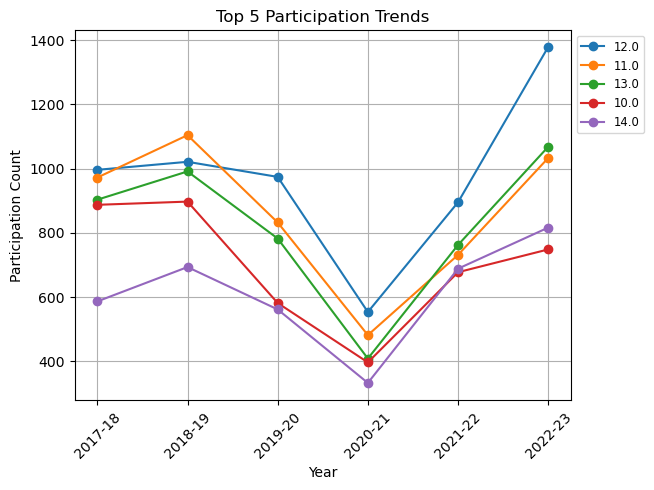

In [447]:
plot_category_trends(agew_over)

In [449]:
agew_over=group_by_columns(female_datasets, years, groupby_cols=['Age'], count_col=sport_column)

Summary Value
Age                
12.0         2151.0
11.0         2068.0
10.0         1936.0
13.0         1927.0
9.0          1610.0

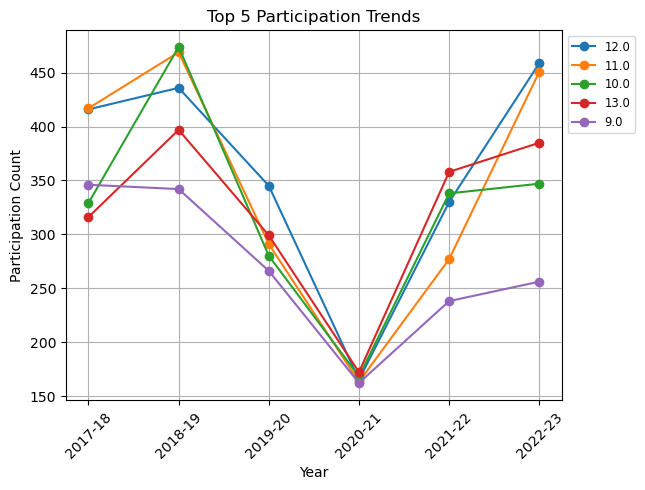

In [451]:
plot_category_trends(agew_over)

# Age-RFU-Overall

In [653]:
age_columns_rfu = ['U7M', 'U7F', 'U8M', 'U8F', 'U9M', 'U9F', 'U10M', 'U10F',
                   'U11M', 'U11F', 'U12M', 'U12F', 'U13M', 'U13F', 'U14M', 'U14F',
                   'U15M', 'U15F', 'U16M', 'U16F', 'U17M','U17F']

In [689]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_top5_total_age_groups(dfs, years, age_columns):
    total_trend = {}

    for df, year in zip(dfs, years):
        yearly_totals = {}
        for col in age_columns:
            base_age = col[:-1]  # strip 'M' or 'F'
            male_col = base_age + 'M'
            female_col = base_age + 'F'

            if male_col in df.columns and female_col in df.columns:
                total = df[[male_col, female_col]].sum().sum()
                yearly_totals[base_age] = total

        total_trend[year] = yearly_totals

    total_df = pd.DataFrame(total_trend).T

    # Get top 5 by average participation
    top5_ages = total_df.mean().sort_values(ascending=False).head(5).index.tolist()

    # Plot
    plt.figure(figsize=(10, 6))
    for age in top5_ages:
        plt.plot(total_df.index, total_df[age], marker='o', label=age)

    plt.title("Top 5 Age Groups by Total Participation (M + F)")
    plt.xlabel("Year")
    plt.ylabel("Participants")
    plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return total_df[top5_ages]


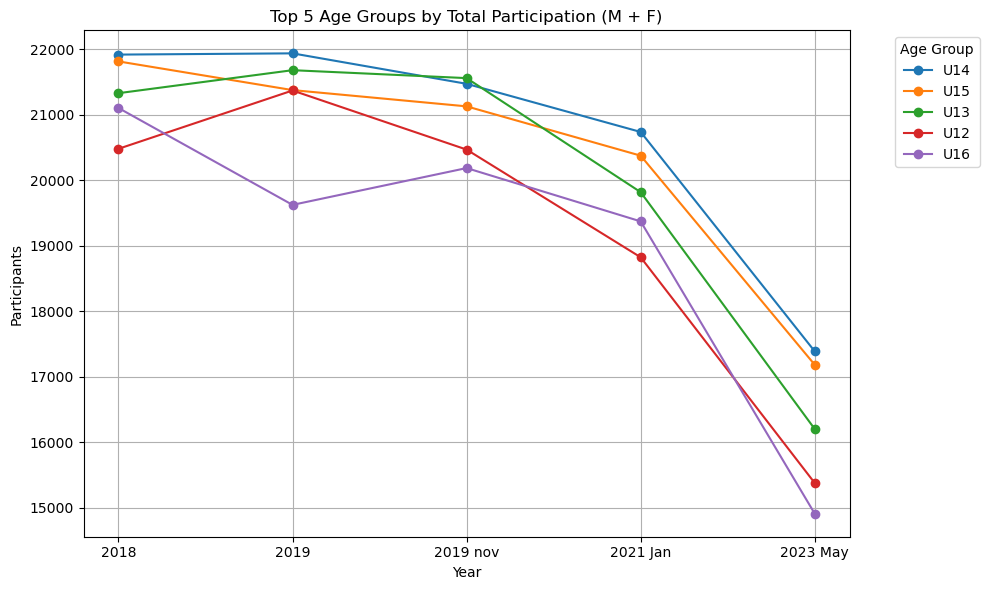

U14    U15    U13    U12    U16
2018      21918  21814  21329  20480  21103
2019      21937  21376  21680  21370  19624
2019 nov  21472  21128  21559  20468  20186
2021 Jan  20737  20375  19818  18824  19372
2023 May  17388  17183  16202  15378  14910

In [693]:
plot_top5_total_age_groups(dfs, years, age_columns=age_columns_rfu)

In [677]:
def analyze_top5_overall_age_groups(dfs, years, age_columns):
    overall_trend = {}

    for df, year in zip(dfs, years):
        overall_totals = df[age_columns].sum(axis=0)
        overall_trend[year] = overall_totals

    overall_df = pd.DataFrame(overall_trend).T
    top_5_overall = overall_df.mean().sort_values(ascending=False).head(5).index.tolist()

    plt.figure(figsize=(10, 6))
    for col in top_5_overall:
        plt.plot(overall_df.index, overall_df[col], marker='o', label=col)
    plt.title("Top 5 Overall Age Groups by Participation (Year-on-Year)")
    plt.xlabel("Year")
    plt.ylabel("Participants")
    plt.legend(title="Age Group")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return overall_df

def analyze_top5_male_age_groups(dfs, years, age_columns):
    male_cols = [col for col in age_columns if col.endswith('M')]
    male_trend = {}

    for df, year in zip(dfs, years):
        male_totals = df[male_cols].sum(axis=0)
        male_trend[year] = male_totals

    male_df = pd.DataFrame(male_trend).T
    top_5_males = male_df.mean().sort_values(ascending=False).head(5).index.tolist()

    plt.figure(figsize=(10, 6))
    for col in top_5_males:
        plt.plot(male_df.index, male_df[col], marker='o', label=col)
    plt.title("Top 5 Male Age Groups by Participation (Year-on-Year)")
    plt.xlabel("Year")
    plt.ylabel("Participants")
    plt.legend(title="Age Group")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return male_df
    
def analyze_top5_female_age_groups(dfs, years, age_columns):
    female_cols = [col for col in age_columns if col.endswith('F')]
    female_trend = {}

    for df, year in zip(dfs, years):
        female_totals = df[female_cols].sum(axis=0)
        female_trend[year] = female_totals

    female_df = pd.DataFrame(female_trend).T
    top_5_females = female_df.mean().sort_values(ascending=False).head(5).index.tolist()

    plt.figure(figsize=(10, 6))
    for col in top_5_females:
        plt.plot(female_df.index, female_df[col], marker='o', label=col)
    plt.title("Top 5 Female Age Groups by Participation (Year-on-Year)")
    plt.xlabel("Year")
    plt.ylabel("Participants")
    plt.legend(title="Age Group")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return female_df


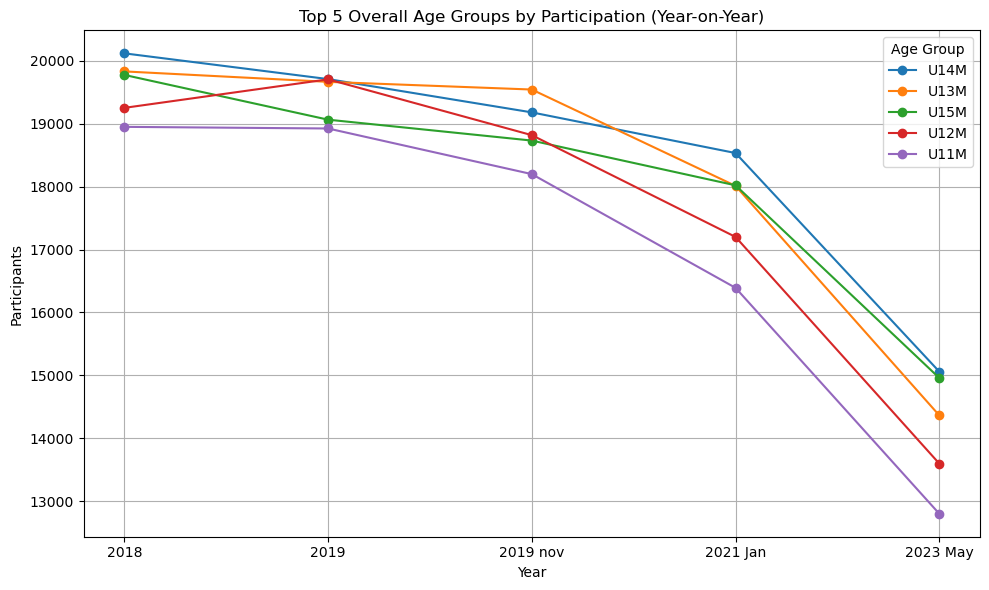

U7M   U7F    U8M   U8F    U9M   U9F   U10M  U10F   U11M  U11F  \
2018       6642   767  12340  1204  15108  1347  17380  1393  18949  1316   
2019      11064  1198  14482  1476  16659  1499  18003  1507  18923  1406   
2019 nov   9986  1056  12749  1383  15574  1523  17195  1507  18198  1530   
2021 Jan   7372   922  11191  1229  13402  1412  15460  1500  16391  1465   
2023 May   9481  1354  10741  1391  11839  1479  12735  1324  12802  1564   

          ...   U13M  U13F   U14M  U14F   U15M  U15F   U16M  U16F   U17M  U17F  
2018      ...  19830  1499  20117  1801  19774  2040  19011  2092  17155  2002  
2019      ...  19664  2016  19708  2229  19063  2313  17501  2123  15323  1829  
2019 nov  ...  19542  2017  19179  2293  18731  2397  17908  2278  15503  1928  
2021 Jan  ...  18011  1807  18533  2204  18020  2355  16964  2408  15668  2074  
2023 May  ...  14365  1837  15060  2328  14959  2224  12579  2331   8511  1314  

[5 rows x 22 columns]

In [679]:
analyze_top5_overall_age_groups(dfs, years, age_columns_rfu)

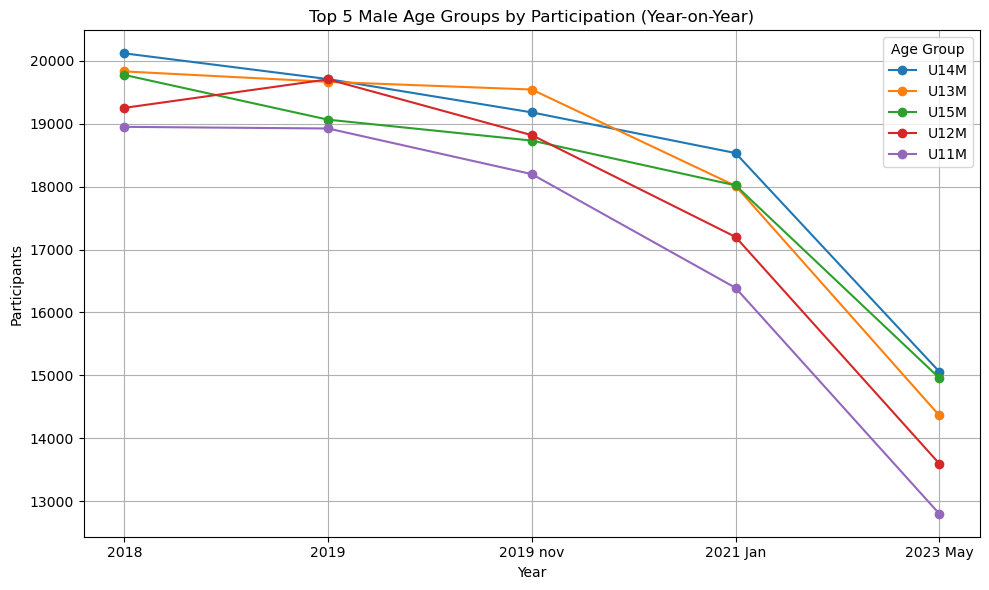

U7M    U8M    U9M   U10M   U11M   U12M   U13M   U14M   U15M  \
2018       6642  12340  15108  17380  18949  19251  19830  20117  19774   
2019      11064  14482  16659  18003  18923  19704  19664  19708  19063   
2019 nov   9986  12749  15574  17195  18198  18817  19542  19179  18731   
2021 Jan   7372  11191  13402  15460  16391  17200  18011  18533  18020   
2023 May   9481  10741  11839  12735  12802  13599  14365  15060  14959   

           U16M   U17M  
2018      19011  17155  
2019      17501  15323  
2019 nov  17908  15503  
2021 Jan  16964  15668  
2023 May  12579   8511

In [657]:
analyze_top5_male_age_groups(dfs, years, age_columns_rfu)

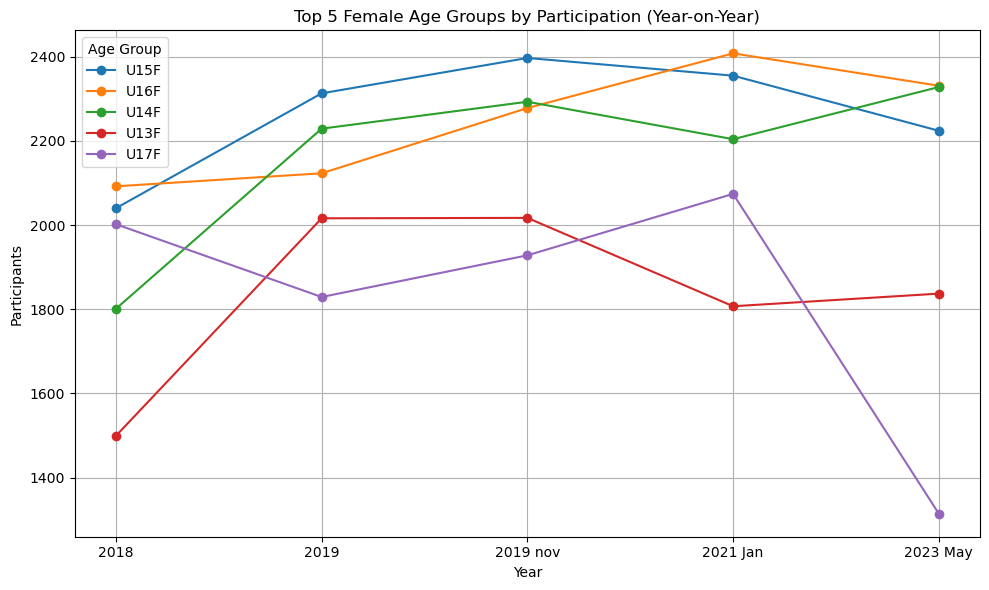

U7F   U8F   U9F  U10F  U11F  U12F  U13F  U14F  U15F  U16F  U17F
2018       767  1204  1347  1393  1316  1229  1499  1801  2040  2092  2002
2019      1198  1476  1499  1507  1406  1666  2016  2229  2313  2123  1829
2019 nov  1056  1383  1523  1507  1530  1651  2017  2293  2397  2278  1928
2021 Jan   922  1229  1412  1500  1465  1624  1807  2204  2355  2408  2074
2023 May  1354  1391  1479  1324  1564  1779  1837  2328  2224  2331  1314

In [659]:
analyze_top5_female_age_groups(dfs, years, age_columns_rfu)